<center><img src = "https://github.com/Trading-com-Dados/pmf/blob/main/logotipo-trading-com-dados.svg?raw=true" width = "200">

<center><img src = "https://github.com/Trading-com-Dados/pmf/blob/main/PMF%20002.png?raw=true" width = "700">

---
# **Análise Quantitativa com Python**
---

## **1. Bibliotecas**

***Todas as bibliotecas usadas no módulo 08 estão aqui. Caso queira instalar as mesmas versões e estiver em uma IDE, siga os passos abaixo:***

Os comandos abaixo podem ser rodados em uma nova célula deste jupyter notebook.
- Crie um ambiente virtual (não é obrigatório, mas é uma boa prática):
  ```!python -m venv .venv```
- Ative o ambiente virtual:
    - No Windows: ```!.venv\Scripts\activate```
    - No Linux/Mac: ```!source .venv/bin/activate```
- Instale as bibliotecas com o arquivo requirements.txt:
  ```!pip install -r requirements.txt```

In [132]:
import numpy as np
import pandas as pd
import yfinance as yf
import os
import xlsxwriter
from scipy.stats import skew, kurtosis, shapiro, norm
from scipy.optimize import Bounds, minimize, rosen, rosen_der, rosen_hess, LinearConstraint
from scipy import stats
from scipy import optimize as opt
import pylab
from statsmodels import regression
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from pypfopt import expected_returns, risk_models, EfficientFrontier
from pypfopt import objective_functions, EfficientSemivariance, HRPOpt
from pypfopt import plotting
import vectorbt as vbt

## **2. Importação de Dados**

In [4]:
# Pegando o caminho do arquivo
# Verifique se os arquivos estão em uma pasta chamada 'Arquivos alunos' no local do notebook
caminho_arquivos = os.path.join(os.getcwd(), 'Arquivos alunos')
arquivo_nome = 'Analise_Quantitativa_ITSA4.SA.csv'
camino_completo = os.path.join(caminho_arquivos, arquivo_nome)

itsa4 = pd.read_csv(camino_completo)
itsa4

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,11.533333,12.095238,11.504761,12.047619,9.976935,26420835
1,2019-01-03,12.047619,12.152380,11.914285,12.152380,10.063692,39787545
2,2019-01-04,12.057142,12.219047,11.961904,12.114285,10.032145,34350960
3,2019-01-07,12.095238,12.209523,12.019047,12.104761,10.024262,14108115
4,2019-01-08,12.104761,12.266666,11.952380,12.266666,10.158338,18163425
...,...,...,...,...,...,...,...
612,2021-06-23,11.266666,11.438095,11.104761,11.161904,10.453444,37877175
613,2021-06-24,11.238095,11.247619,11.047619,11.200000,10.489122,24184440
614,2021-06-25,11.152380,11.209523,10.866666,10.933333,10.239382,53819010
615,2021-06-28,10.933333,10.933333,10.685714,10.819047,10.132348,60929085


In [5]:
itsa4.index = itsa4['Date']
itsa4

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2019-01-02,2019-01-02,11.533333,12.095238,11.504761,12.047619,9.976935,26420835
2019-01-03,2019-01-03,12.047619,12.152380,11.914285,12.152380,10.063692,39787545
2019-01-04,2019-01-04,12.057142,12.219047,11.961904,12.114285,10.032145,34350960
2019-01-07,2019-01-07,12.095238,12.209523,12.019047,12.104761,10.024262,14108115
2019-01-08,2019-01-08,12.104761,12.266666,11.952380,12.266666,10.158338,18163425
...,...,...,...,...,...,...,...
2021-06-23,2021-06-23,11.266666,11.438095,11.104761,11.161904,10.453444,37877175
2021-06-24,2021-06-24,11.238095,11.247619,11.047619,11.200000,10.489122,24184440
2021-06-25,2021-06-25,11.152380,11.209523,10.866666,10.933333,10.239382,53819010


In [6]:
itsa4.drop(columns={'Date'}, inplace=True)
itsa4

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,11.533333,12.095238,11.504761,12.047619,9.976935,26420835
2019-01-03,12.047619,12.152380,11.914285,12.152380,10.063692,39787545
2019-01-04,12.057142,12.219047,11.961904,12.114285,10.032145,34350960
2019-01-07,12.095238,12.209523,12.019047,12.104761,10.024262,14108115
2019-01-08,12.104761,12.266666,11.952380,12.266666,10.158338,18163425
...,...,...,...,...,...,...
2021-06-23,11.266666,11.438095,11.104761,11.161904,10.453444,37877175
2021-06-24,11.238095,11.247619,11.047619,11.200000,10.489122,24184440
2021-06-25,11.152380,11.209523,10.866666,10.933333,10.239382,53819010


In [7]:
itsa4.rename({'Adj Close': 'ITAU'}, axis=1, inplace=True)
itsa4

,Open,High,Low,Close,ITAU,Volume
Date,,,,,,
2019-01-02,11.533333,12.095238,11.504761,12.047619,9.976935,26420835
2019-01-03,12.047619,12.152380,11.914285,12.152380,10.063692,39787545
2019-01-04,12.057142,12.219047,11.961904,12.114285,10.032145,34350960
2019-01-07,12.095238,12.209523,12.019047,12.104761,10.024262,14108115
2019-01-08,12.104761,12.266666,11.952380,12.266666,10.158338,18163425
...,...,...,...,...,...,...
2021-06-23,11.266666,11.438095,11.104761,11.161904,10.453444,37877175
2021-06-24,11.238095,11.247619,11.047619,11.200000,10.489122,24184440
2021-06-25,11.152380,11.209523,10.866666,10.933333,10.239382,53819010


In [8]:
itsa4.drop(itsa4.columns[[0,1,2,3,5]], axis=1, inplace=True)
itsa4

,ITAU
Date,
2019-01-02,9.976935
2019-01-03,10.063692
2019-01-04,10.032145
2019-01-07,10.024262
2019-01-08,10.158338
...,...
2021-06-23,10.453444
2021-06-24,10.489122
2021-06-25,10.239382


## **3. Cálculo dos Retornos**

In [9]:
itau_retornos = itsa4.pct_change()
itau_retornos

,ITAU
Date,
2019-01-02,NaN
2019-01-03,0.008696
2019-01-04,-0.003135
2019-01-07,-0.000786
2019-01-08,0.013375
...,...
2021-06-23,-0.009299
2021-06-24,0.003413
2021-06-25,-0.023809


## **4. Visualização dos Dados**

In [10]:
fig = go.Figure()
fig.add_trace(go.Scatter(name='ITSA4', x=itsa4.index, y=itsa4['ITAU']))
fig.update_layout(title_text='Cotação ITSA4', template='simple_white')
fig.show()

In [11]:
fig = go.Figure()
fig.add_trace(go.Scatter(name='ITAU_RETORNOS', x=itau_retornos.index, y=itau_retornos['ITAU']))
fig.update_layout(title_text='Retornos ITSA4', template='simple_white')
fig.show()

In [12]:
fig = go.Figure()
fig.add_trace(go.Histogram(name='Retornos ITSA4', x=itau_retornos['ITAU']))
fig.update_layout(title_text='Histograma Retornos ITSA4', template='simple_white')
fig.show()

## **5. Medidas Descritivas**

### **5.1 Média**

$$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$

In [13]:
# Média dos retornos ITSA4

itau_retornos.mean()

ITAU    0.000251
dtype: float64

In [14]:
# Média dos Preços ITSA4

itsa4['ITAU'].mean()

9.664419314424636

### **5.2 Mediana**

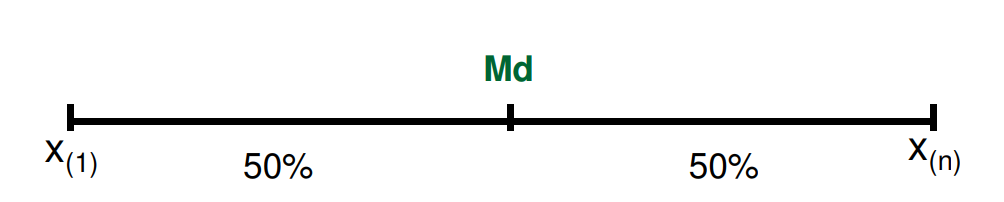

In [15]:
itau_retornos.median()

ITAU    0.0
dtype: float64

### **5.3 Quartis**

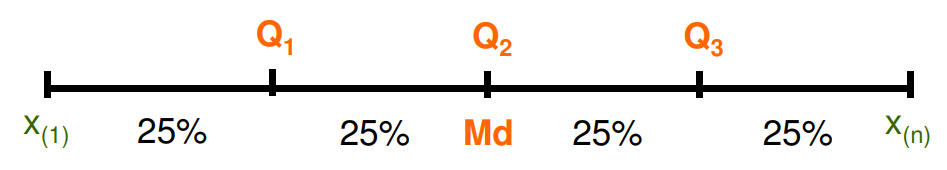

In [16]:
itau_retornos.describe()

,ITAU
count,616.000000
mean,0.000251
std,0.021634
min,-0.108654
25%,-0.012687
50%,0.000000
75%,0.012237
max,0.100324


## **6. Medidas de Dispersão**

### **6.1 Amplitude**

In [17]:
minimo = itau_retornos.min()
maximo = itau_retornos.max()
amplitude = minimo-maximo
amplitude

ITAU   -0.208977
dtype: float64

### **6.2 Variância**

$$s^{2} = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}}{n-1}$$

In [18]:
itau_retornos.var()

ITAU    0.000468
dtype: float64

### **6.3 Desvio Padrão**

$$s = \sqrt{s^{2}}$$

In [19]:
itau_retornos.std()

ITAU    0.021634
dtype: float64

### **6.4 Coeficiente de Variação**

$$CV = \frac{s}{\overline{x}}$$

In [20]:
cv = (itau_retornos.std())/(itau_retornos.mean())
cv

ITAU    86.209613
dtype: float64

## **7. Análises em Janela de Tempo**

### **7.1 Média Móvel**

In [21]:
mm_20 = itau_retornos.rolling(window=20).mean()
mm_20

,ITAU
Date,
2019-01-02,NaN
2019-01-03,NaN
2019-01-04,NaN
2019-01-07,NaN
2019-01-08,NaN
...,...
2021-06-23,0.004477
2021-06-24,0.004184
2021-06-25,0.003637


In [22]:
mm_20p = itsa4.rolling(window=20).mean()
mm_20p

,ITAU
Date,
2019-01-02,NaN
2019-01-03,NaN
2019-01-04,NaN
2019-01-07,NaN
2019-01-08,NaN
...,...
2021-06-23,10.348701
2021-06-24,10.389711
2021-06-25,10.424454


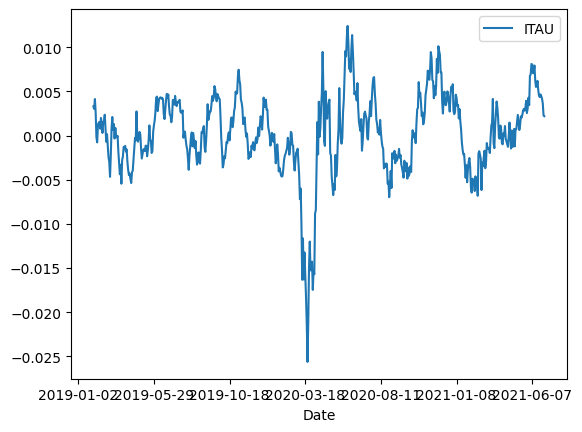

In [23]:
mm_20.plot();

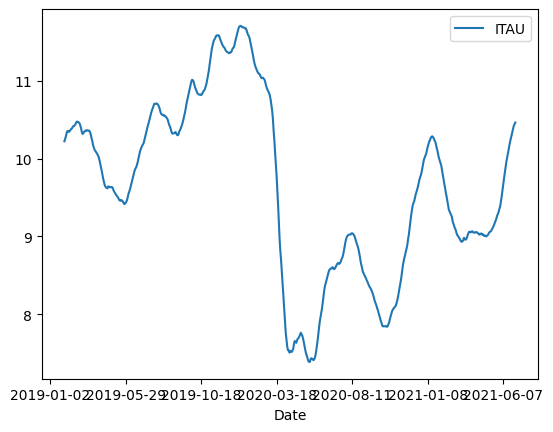

In [24]:
mm_20p.plot();

In [25]:
fig = go.Figure()
fig.add_trace(go.Scatter(name='Preços', x=itsa4.index, y=itsa4['ITAU']))
fig.add_trace(go.Scatter(name='MM20', x=itsa4.index, y=mm_20p['ITAU']))
fig.show()

### **7.2 Janela de Volatilidade**

In [26]:
vol_20 = itau_retornos.rolling(window=20).std()

In [27]:
fig = go.Figure()
fig.add_trace(go.Scatter(name='Vol 20D', x=vol_20.index, y=vol_20['ITAU']))
fig.show()

### **7.3 Janela Retornos Mínimos**

In [28]:
min_retornos = itau_retornos.rolling(window=20).min()

In [29]:
fig = go.Figure()
fig.add_trace(go.Scatter(name='Min 20D', x=min_retornos.index, y=min_retornos['ITAU']))
fig.show()

## **8. Skewness**

Zero ou simetricamente distribuída

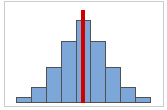

Positiva ou right-skewed

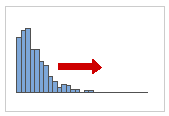

Negativa ou left-skewed

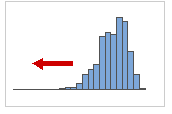

In [31]:
retornos_ok = itau_retornos.dropna()

In [32]:
skew_itau = skew(retornos_ok)

In [33]:
skew_itau

array([-0.15883004])

## **9. Kurtosis**

Baseline

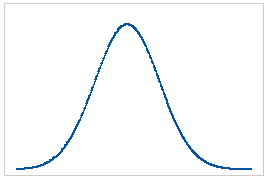

Positiva

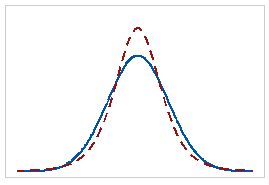

Negativa

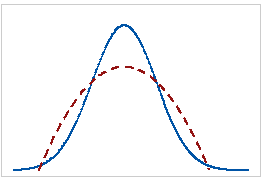

In [35]:
curtose_itau = kurtosis(retornos_ok)

In [36]:
curtose_itau

array([3.53753263])

## **10. Testes de Normalidade**

Distribuição Normal

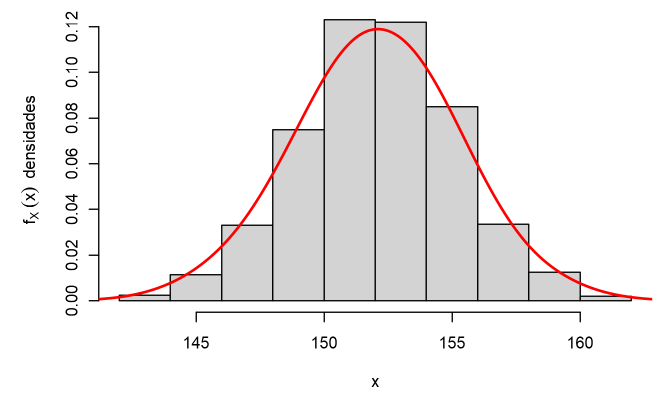

Função Densidadade de Probabilidade

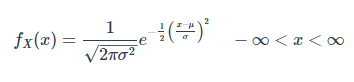

Valor esperado e variância

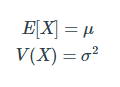

N(média = 10, desvpad=4)

P(X) no intervalo [8,12]

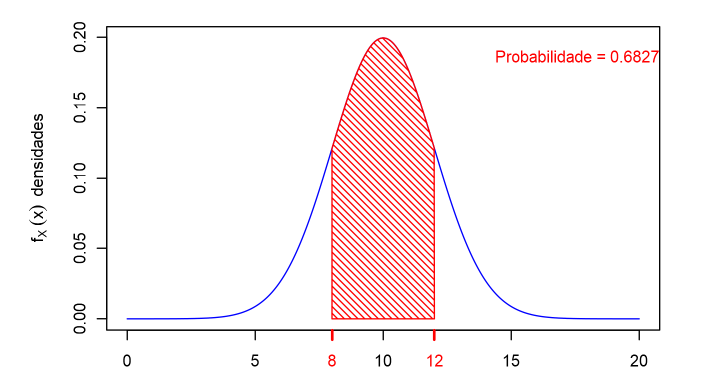

P(X) no intervalo [4,16]

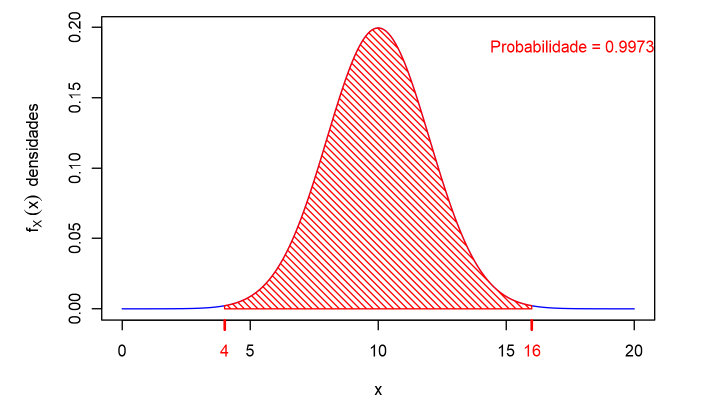

Resumo

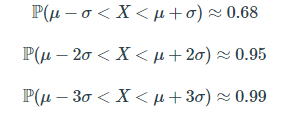

### **10.1. Teste de Normalidade Shapiro-Wik**

In [38]:
shapiro_itau = shapiro(retornos_ok)

In [39]:
if shapiro_itau[1] <=0.05:
  print('Amostra não possui distribuição normal')
else:
  print('Minha amostra possui distribuição normal')

Amostra não possui distribuição normal


### **10.2. Gráfico QQPlot**

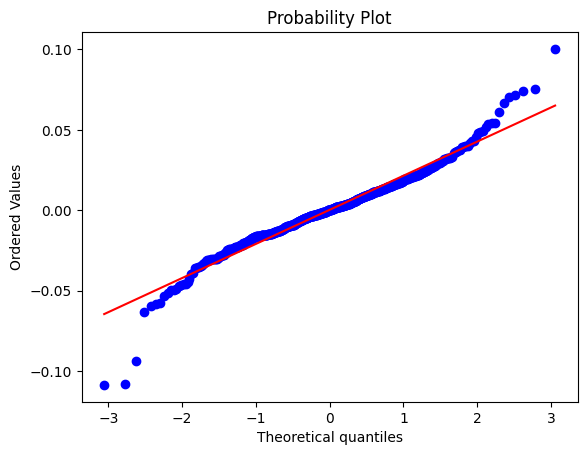

In [41]:
stats.probplot(retornos_ok['ITAU'], dist='norm', plot=pylab)
pylab.show()

## **11. Value at Risk (VaR)**

### **11.1. Método Histórico**

In [42]:
var_90 = np.nanpercentile(itau_retornos,10)
var_95 = np.nanpercentile(itau_retornos, 5)
var_99 = np.nanpercentile(itau_retornos,1)

In [43]:
print(var_90,var_95, var_99)

-0.023141462164663562 -0.03117424129530197 -0.057120382912757374


***Existe 10% de chance de incorrer em perdas diárias maiores que 2,31%***

### **11.2. Método Paramétrico**

In [ ]:
media = np.mean(itau_retornos, axis=0)  # Média por coluna
desvpad = np.std(itau_retornos, axis=0)  # Desvio padrão por coluna

In [47]:
var_p_90 = norm.ppf(1-0.9, media, desvpad)

In [48]:
print(var_p_90)

[-0.02745189]


## **12. Fundamentos do Portfólio**

### **12.1. Conceitos**

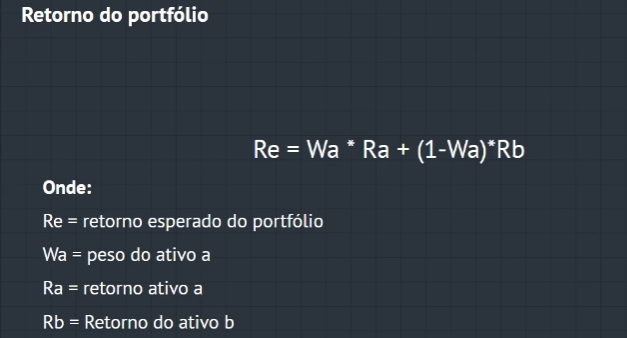



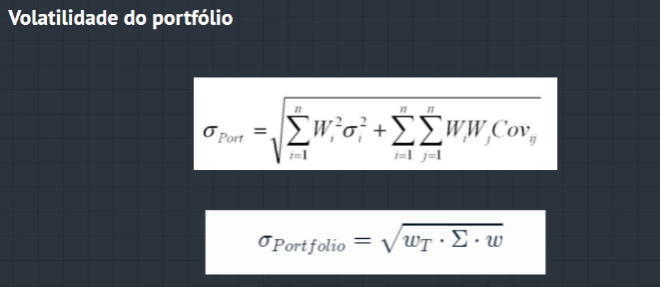

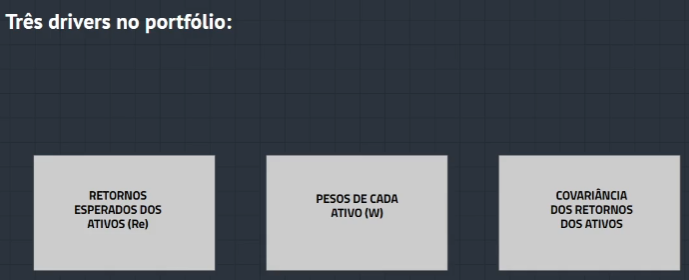

### **12.2. Obtendo Dados**

Selecionando os ativos e pesos

In [52]:
#Portfolio 1/n
#Período: 01/01/2016 a 30/12/2020

ativos = ['ITSA4.SA', 'PETR4.SA', 'ABEV3.SA', 'VALE3.SA']
pesos = np.array([0.25,0.25,0.25,0.25])

In [54]:
caminho_arquivos = os.path.join(os.getcwd(), 'Arquivos alunos')
arquivo_nome = 'carteira_precos.csv'
camino_completo = os.path.join(caminho_arquivos, arquivo_nome)

carteira_precos = pd.read_csv(camino_completo)
carteira_precos

,Date,ABEV3.SA,ITSA4.SA,PETR4.SA,VALE3.SA
0,2016-01-04,14.220699,3.148402,3.027316,8.448511
1,2016-01-05,14.443801,3.200876,2.943592,8.335332
2,2016-01-06,14.303331,3.229498,2.820208,7.722830
3,2016-01-07,13.923228,3.181795,2.758516,7.263455
4,2016-01-08,14.105015,3.181795,2.762922,7.017122
...,...,...,...,...,...
1239,2020-12-21,14.770419,8.988072,12.834467,67.598900
1240,2020-12-22,14.856628,9.003868,12.957965,67.661163
1241,2020-12-23,14.847050,9.217117,13.276214,67.988029
1242,2020-12-28,15.105676,9.319796,13.385463,67.949104


In [55]:
carteira_precos.index = carteira_precos['Date']
carteira_precos.drop(columns={'Date'},inplace=True)
carteira_precos

,ABEV3.SA,ITSA4.SA,PETR4.SA,VALE3.SA
Date,,,,
2016-01-04,14.220699,3.148402,3.027316,8.448511
2016-01-05,14.443801,3.200876,2.943592,8.335332
2016-01-06,14.303331,3.229498,2.820208,7.722830
2016-01-07,13.923228,3.181795,2.758516,7.263455
2016-01-08,14.105015,3.181795,2.762922,7.017122
...,...,...,...,...
2020-12-21,14.770419,8.988072,12.834467,67.598900
2020-12-22,14.856628,9.003868,12.957965,67.661163
2020-12-23,14.847050,9.217117,13.276214,67.988029


### **12.3. Calculando Retorno do Portfólio**

In [56]:
retorno_precos = carteira_precos.pct_change()
retorno_precos

,ABEV3.SA,ITSA4.SA,PETR4.SA,VALE3.SA
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,0.015689,0.016667,-0.027656,-0.013396
2016-01-06,-0.009725,0.008942,-0.041916,-0.073483
2016-01-07,-0.026574,-0.014771,-0.021875,-0.059483
2016-01-08,0.013056,0.000000,0.001597,-0.033914
...,...,...,...,...
2020-12-21,-0.027743,-0.015571,-0.038434,-0.010706
2020-12-22,0.005837,0.001757,0.009622,0.000921
2020-12-23,-0.000645,0.023684,0.024560,0.004831


#### **12.3.1. Retorno Diário**

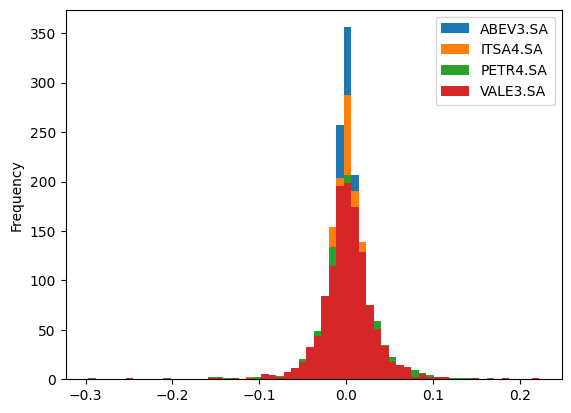

In [57]:
retorno_precos.plot.hist(bins=60);

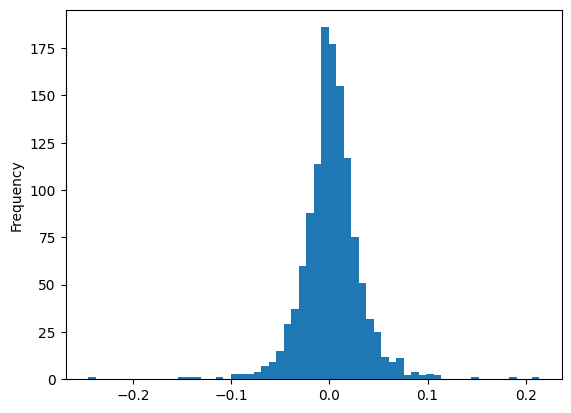

In [58]:
retorno_precos['VALE3.SA'].plot.hist(bins=60);

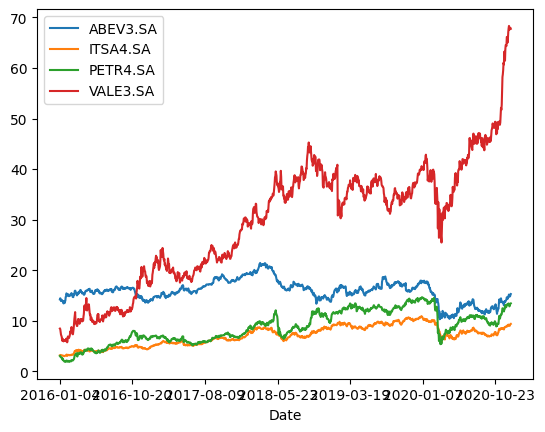

In [59]:
carteira_precos.plot();

#### **12.3.2. Retornos Acumulados dos Ativos**

In [60]:
retorno_acm_acoes = (1+retorno_precos).cumprod()

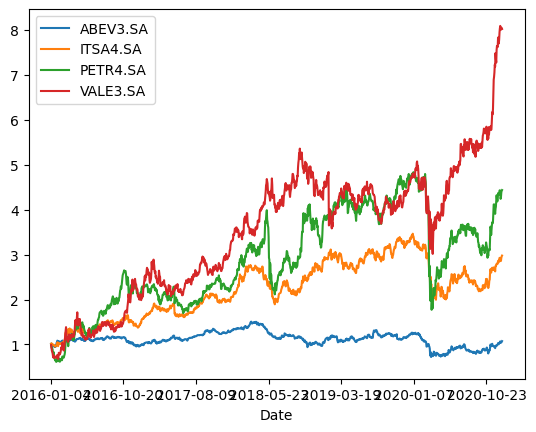

In [62]:
retorno_acm_acoes.plot();

#### **12.3.3. Retorno Diário do Portfolio**

In [63]:
retorno_carteira = (retorno_precos * pesos).sum(axis=1)

In [64]:
retorno_portfolio = pd.DataFrame()
retorno_portfolio['Retornos'] = retorno_carteira
retorno_portfolio

,Retornos
Date,
2016-01-04,0.000000
2016-01-05,-0.002174
2016-01-06,-0.029045
2016-01-07,-0.030676
2016-01-08,-0.004815
...,...
2020-12-21,-0.023114
2020-12-22,0.004534
2020-12-23,0.013108


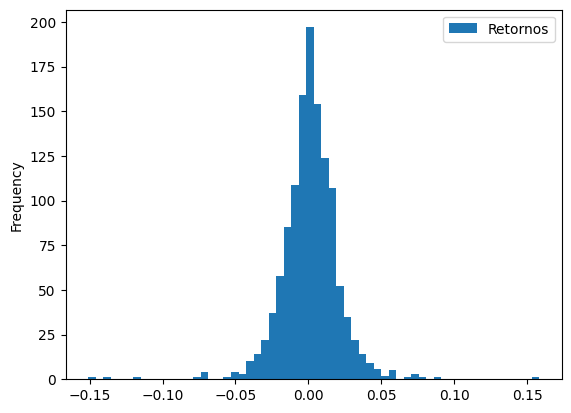

In [65]:
retorno_portfolio.plot.hist(bins=60);

In [66]:
retorno_portfolio.describe()

,Retornos
count,1244.000000
mean,0.001299
std,0.019633
min,-0.150956
25%,-0.008286
50%,0.001331
75%,0.011687
max,0.158211


#### **12.3.4. Retornos Acumulados do Portfólio**

In [67]:
retorno_acm_carteira = (1+retorno_portfolio).cumprod()

In [68]:
retorno_acm_carteira.head()

,Retornos
Date,
2016-01-04,1.000000
2016-01-05,0.997826
2016-01-06,0.968843
2016-01-07,0.939123
2016-01-08,0.934601


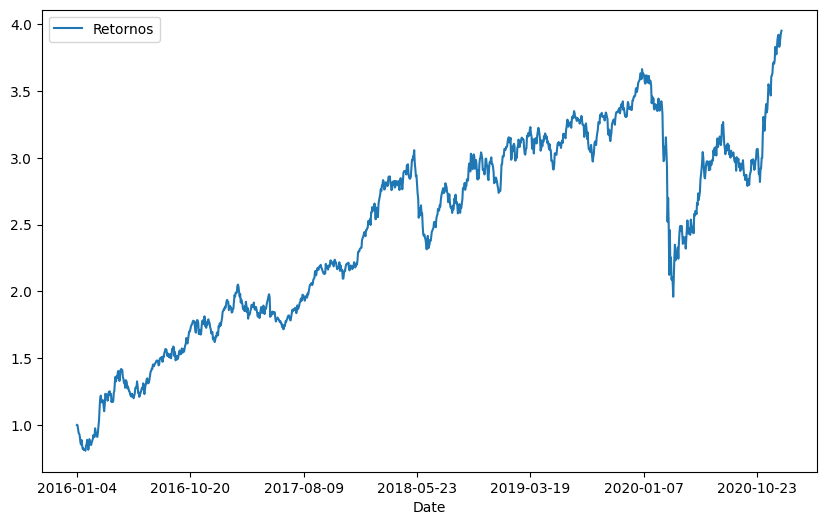

In [69]:
retorno_acm_carteira.plot(figsize=(10,6));

### **12.4. Volatilidade do Portfólio**

In [70]:
cov_matrix = retorno_precos.cov()

In [71]:
cov_matrix

,ABEV3.SA,ITSA4.SA,PETR4.SA,VALE3.SA
ABEV3.SA,0.000322,0.000180,0.000238,0.000146
ITSA4.SA,0.000180,0.000419,0.000413,0.000225
PETR4.SA,0.000238,0.000413,0.001079,0.000509
VALE3.SA,0.000146,0.000225,0.000509,0.000928


In [72]:
retorno_precos.var()

ABEV3.SA    0.000322
ITSA4.SA    0.000419
PETR4.SA    0.001079
VALE3.SA    0.000928
dtype: float64

#### **12.4.1. Volatilidade Diária do Portfólio**

In [73]:
vol_carteira = np.sqrt(np.dot(pesos.T, np.dot(cov_matrix,pesos)))

In [74]:
vol_carteira

0.019641034809602012

In [75]:
vol_ano = vol_carteira*np.sqrt(252)

In [76]:
vol_ano

0.3117917615890187

### **12.5. Benchmark do Portfólio**

In [78]:
# caminho do arquivo
caminhos_arquivos = os.path.join(os.getcwd(), 'Arquivos alunos')
caminho_completo = os.path.join(caminho_arquivos, 'ibov3.csv')

ibov = pd.read_csv(caminho_completo)
ibov

,Date,Close
0,2016-01-04,42141.0
1,2016-01-05,42419.0
2,2016-01-06,41773.0
3,2016-01-07,40695.0
4,2016-01-08,40612.0
...,...,...
1232,2020-12-22,116348.0
1233,2020-12-23,117857.0
1234,2020-12-28,119051.0
1235,2020-12-29,119475.0


In [79]:
ibov.index = ibov['Date']
ibov.drop(columns={'Date'},inplace=True)
ibov

,Close
Date,
2016-01-04,42141.0
2016-01-05,42419.0
2016-01-06,41773.0
2016-01-07,40695.0
2016-01-08,40612.0
...,...
2020-12-22,116348.0
2020-12-23,117857.0
2020-12-28,119051.0


In [80]:
ibov.rename(columns={'Close':'Ibov'},inplace=True)
ibov

,Ibov
Date,
2016-01-04,42141.0
2016-01-05,42419.0
2016-01-06,41773.0
2016-01-07,40695.0
2016-01-08,40612.0
...,...
2020-12-22,116348.0
2020-12-23,117857.0
2020-12-28,119051.0


In [81]:
ibov_retornos = ibov.pct_change()
ibov_acm = (1+ibov_retornos).cumprod()
ibov_acm

,Ibov
Date,
2016-01-04,NaN
2016-01-05,1.006597
2016-01-06,0.991267
2016-01-07,0.965687
2016-01-08,0.963717
...,...
2020-12-22,2.760922
2020-12-23,2.796730
2020-12-28,2.825063


In [82]:
# Criar df benchmark

benchmark = pd.merge(retorno_acm_carteira, ibov_acm, how='inner', right_index=True, left_index=True)
benchmark

,Retornos,Ibov
Date,,
2016-01-04,1.000000,NaN
2016-01-05,0.997826,1.006597
2016-01-06,0.968843,0.991267
2016-01-07,0.939123,0.965687
2016-01-08,0.934601,0.963717
...,...,...
2020-12-21,3.830515,2.753043
2020-12-22,3.847884,2.760922
2020-12-23,3.898320,2.796730


In [83]:
benchmark.dropna(inplace=True)

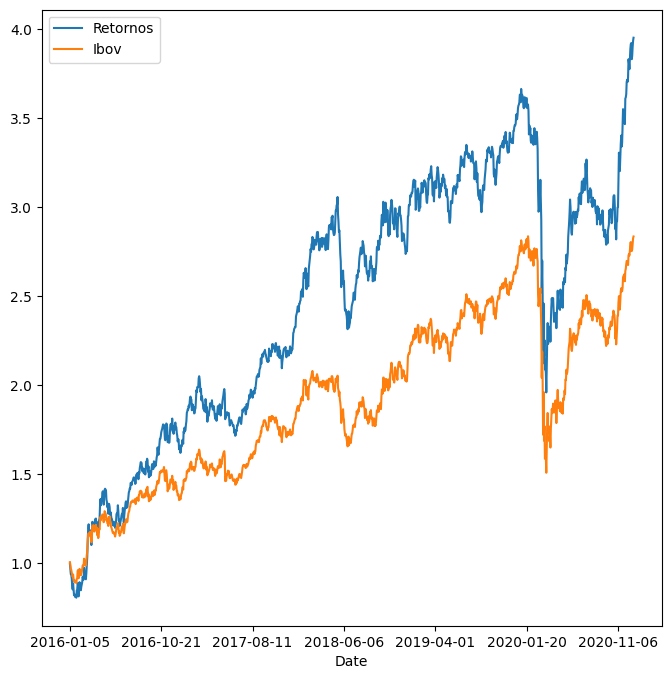

In [84]:
benchmark.plot(figsize=(8,8));

### **12.6. Beta do Portfólio**

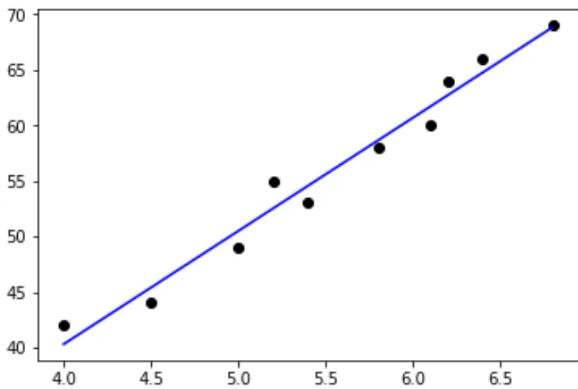

$$E(x) = a + bx + u$$

In [85]:
retorno_carteira = pd.DataFrame(retorno_carteira, columns=['Retorno'])
retorno_carteira

,Retorno
Date,
2016-01-04,0.000000
2016-01-05,-0.002174
2016-01-06,-0.029045
2016-01-07,-0.030676
2016-01-08,-0.004815
...,...
2020-12-21,-0.023114
2020-12-22,0.004534
2020-12-23,0.013108


In [86]:
ibov_retornos

,Ibov
Date,
2016-01-04,NaN
2016-01-05,0.006597
2016-01-06,-0.015229
2016-01-07,-0.025806
2016-01-08,-0.002040
...,...
2020-12-22,0.002862
2020-12-23,0.012970
2020-12-28,0.010131


In [87]:
beta_carteira = pd.merge(retorno_carteira, ibov_retornos, how='inner', left_index=True, right_index=True)
beta_carteira

,Retorno,Ibov
Date,,
2016-01-04,0.000000,NaN
2016-01-05,-0.002174,0.006597
2016-01-06,-0.029045,-0.015229
2016-01-07,-0.030676,-0.025806
2016-01-08,-0.004815,-0.002040
...,...,...
2020-12-21,-0.023114,-0.014132
2020-12-22,0.004534,0.002862
2020-12-23,0.013108,0.012970


In [88]:
beta_carteira.dropna(inplace=True)

In [90]:
Y = beta_carteira['Retorno']
X = beta_carteira['Ibov']

X = sm.add_constant(X)

modelo = sm.OLS(Y, X)
resultado = modelo.fit()

In [91]:
resultado

In [95]:
# Código Antigo
# resultado.params[0]

# Código Atualizado
resultado.params['const']

0.0002639180286425067

In [96]:
# Código Antigo
# resultado.params[1]

# Código Atualizado
resultado.params['Ibov']

1.0445786277119056

In [97]:
beta_carteira = resultado.params['Ibov']
beta_carteira

1.0445786277119056

### **12.7. Função Rolling**

In [98]:
mm_retornos = retorno_carteira.rolling(window=20).mean()
mm_retornos

,Retorno
Date,
2016-01-04,NaN
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,NaN
2016-01-08,NaN
...,...
2020-12-21,0.005432
2020-12-22,0.004140
2020-12-23,0.005056


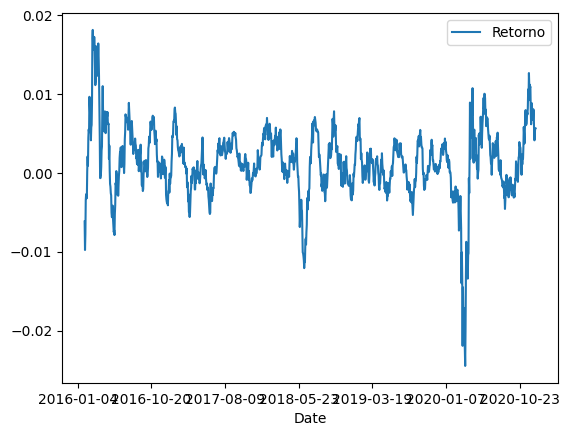

In [99]:
mm_retornos.plot();

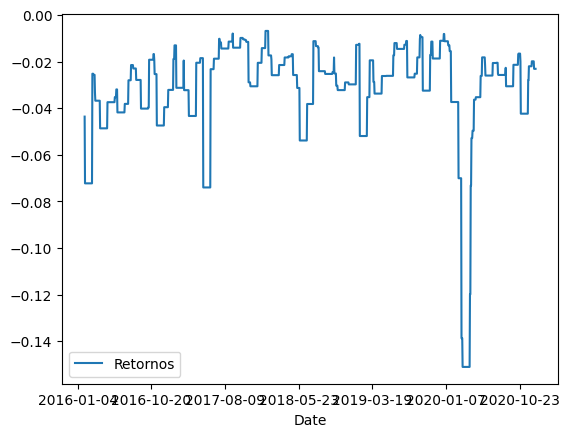

In [100]:
rolling_drawdown = retorno_portfolio.rolling(window=20).min()
rolling_drawdown.plot();

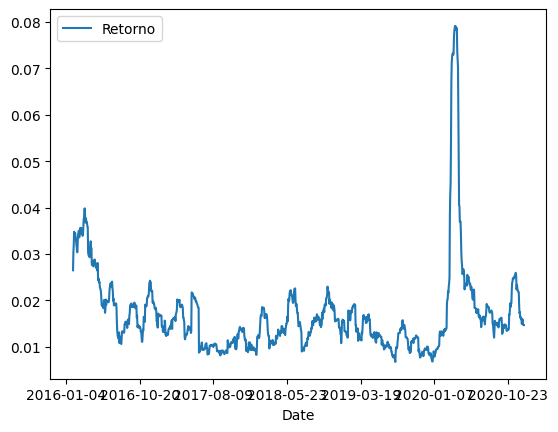

In [101]:
rolling_vol = retorno_carteira.rolling(window=20).std()
rolling_vol.plot();

### **12.8. Value at Risk**

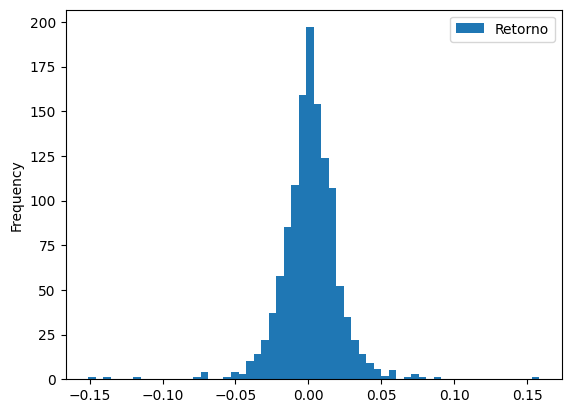

In [102]:
retorno_carteira.plot.hist(bins=60);

#### **12.8.1. VaR Histórico**

In [103]:
var_95 = np.nanpercentile(retorno_portfolio,5)
var_98 = np.nanpercentile(retorno_portfolio, 2)
var_99 = np.nanpercentile(retorno_portfolio, 1)

print(var_95, var_98, var_99)

-0.026708227213022396 -0.038148777501337224 -0.0481163051432019


#### **12.8.2. VaR Paramétrico**

In [104]:
media_retorno_portfolio = np.mean(retorno_portfolio)
desvio_carteira = vol_carteira

In [105]:
# VaR 90%
var_p_90 = norm.ppf(1-0.9, media_retorno_portfolio, desvio_carteira)
var_p_90

-0.023872207467002683

In [106]:
var_p_98 = norm.ppf(1-0.98, media_retorno_portfolio, desvio_carteira)
var_p_98

-0.03903896240174307

### **12.9. Compound Annual Growth Rate (CAGR)**

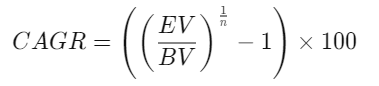

In [107]:
retorno_anualizado = (carteira_precos.iloc[-1]-carteira_precos.iloc[0])/(carteira_precos.iloc[0])

In [108]:
retorno_anualizado

ABEV3.SA    0.074356
ITSA4.SA    1.977727
PETR4.SA    3.435682
VALE3.SA    7.020624
dtype: float64

In [109]:
retorno_an_carteira = ((1+retorno_anualizado)**(12/60))-1
retorno_an_carteira

ABEV3.SA    0.014448
ITSA4.SA    0.243876
PETR4.SA    0.347076
VALE3.SA    0.516497
dtype: float64

In [110]:
retorno_an_carteira = retorno_an_carteira.dot(pesos)
retorno_an_carteira

0.28047411918838955

### **12.10. Sharpe Ratio**

$$Sharpe Ratio = \frac{R_p - R_f}{\sigma_p}$$

In [111]:
# Rf

selic = 0.02

In [112]:
sharpe_ratio = ((retorno_portfolio.mean()*252)-selic)/(vol_ano)
sharpe_ratio

Retornos    0.985579
dtype: float64

### **12.11. Sortino Ratio**

$$Sortino Ratio = \frac{R_p - R_f}{Semivariance}$$

In [113]:
sortino = ((retorno_portfolio.mean()*252)-selic)/(retorno_portfolio[retorno_portfolio<0].std()*np.sqrt(252))
sortino

Retornos    1.295
dtype: float64

### **12.12. Max Drawdown**

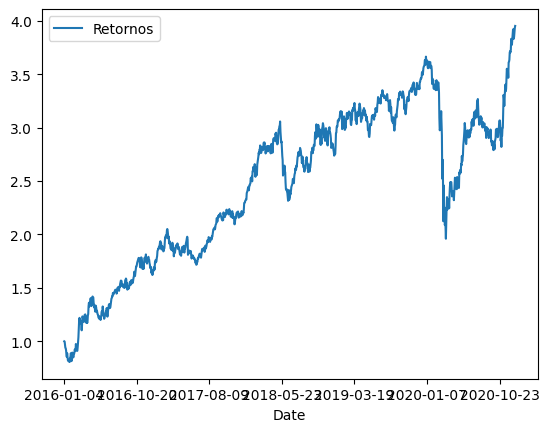

In [114]:
retorno_acm_carteira.plot();

In [115]:
pico = retorno_acm_carteira.expanding(min_periods=1).max()
dd = (retorno_acm_carteira/pico)-1
drawdown = dd.min()
drawdown

Retornos   -0.46509
dtype: float64

### **12.13. Calmar Ratio**

$$Calmar Ratio = \frac{R_p - R_f}{Max Drawdown}$$

In [116]:
calmar = ((retorno_portfolio.mean()*252)-selic)/abs(drawdown)
calmar

Retornos    0.660722
dtype: float64

## **13. Otimização de Portfólio**

### **13.1. Otimização Restrita com Condição de Igualdade**

#### **13.1.1. Maximizando Lucros**

$$L(x,y)=-\frac{1}{4}x^2-\frac{3}{8}y^2-\frac{1}{4}xy+120x+100y-5000$$
    
sujeito a: 
	
$$x+y=230$$
    
$$h(x,y)=x+y-230$$    

In [ ]:
# Menor e maior valor que o x pode assumir
LIMITE_INFERIOR = 0
LIMITE_SUPERIOR = 230
QTD_VARIAVEIS = 2

In [6]:
# Definindo os vetores dos limites
bnds = Bounds(LIMITE_INFERIOR*np.ones(QTD_VARIAVEIS), LIMITE_SUPERIOR*np.ones(QTD_VARIAVEIS))

In [ ]:
# Função restrição
def h(x):
    return x[0]+x[1]-230

In [ ]:
# Função objetivo para encontrar valor mínimo
def funcao_objetivo(x):
    return -1*(-1/4*x[0]**2-3/8*x[1]**2-1/4*x[0]*x[1]+120*x[0]+100*x[1]-5000)

In [9]:
X0 = [100,130]

In [11]:
solucao = minimize(funcao_objetivo,X0,method='SLSQP', bounds=bnds,constraints={'type': 'eq', 'fun': h})

In [12]:
solucao

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -10312.5
       x: [ 1.800e+02  5.000e+01]
     nit: 3
     jac: [-1.750e+01 -1.750e+01]
    nfev: 9
    njev: 3

In [14]:
solucao.x

array([180.,  50.])

In [ ]:
# Função objetivo para encontrar valor máximo
def L(x):
    return -1/4*x[0]**2-3/8*x[1]**2-1/4*x[0]*x[1]+120*x[0]+100*x[1]-5000

In [16]:
L(solucao.x)

10312.5

#### **13.1.2. Função Produção**

$$f(x,y)=100x^{3/4}y^{1/4}$$
    
sujeito a 
    
$$200x+300y\,\,=\,\,60.000$$
    
$$h(x,y)=200x+300y-60000$$    

In [18]:
LIMITE_INFERIOR = 0
LIMITE_SUPERIOR = 60000
QTD_VARIAVEIS = 2

In [19]:
bnds = Bounds(LIMITE_INFERIOR*np.ones(QTD_VARIAVEIS), LIMITE_SUPERIOR*np.ones(QTD_VARIAVEIS))

In [ ]:
# Função restrição
def h(x):
    return 200*x[0]+300*x[1]-60000

In [ ]:
# Função objetivo para minimizar
def funcao_objetivo(x):
    return -1*(100*x[0]**(3/4)*x[1]**(1/4))

In [22]:
X0 = [0,200]

In [23]:
solucao = minimize(funcao_objetivo,X0,method='SLSQP', bounds=bnds,constraints={'type': 'eq', 'fun': h})

In [24]:
(solucao.x).round(0)

array([225.,  50.])

In [25]:
-1*(solucao.fun).round(0)

15448.0

In [26]:
def f(x):
    return 100*x[0]**(3/4)*x[1]**(1/4)

In [27]:
f(solucao.x).round(0)

15448.0

### **13.2. Otimização Restrita com Condição de Desigualdade**

#### **13.2.1. Exemplo de otimização restrita (Condições de KKT)**

$$\mathrm{min} \,\,\,f(x,y)=x^2-2x+y-1$$

sujeito a: 
	
$$x+y\leq 2$$
	
$$y-x=1$$

In [29]:
LIMITE_INFERIOR = -200
LIMITE_SUPERIOR = 200
QTD_VARIAVEIS = 2

In [30]:
bnds = Bounds(LIMITE_INFERIOR*np.ones(QTD_VARIAVEIS), LIMITE_SUPERIOR*np.ones(QTD_VARIAVEIS))

In [ ]:
# Função restrição de igualdade
def h(x):
    return x[1]-x[0]-1

In [ ]:
# Função restrição de desigualdade
def g(x):
    return x[0]+x[1]-2

In [33]:
def funcao_objetivo(x):
    return x[0]**2-2*x[0]+x[1]-1

In [34]:
X0 = [0,1]

In [ ]:
# Definindo as restrições
cons = ({'type': 'ineq', 'fun': g}, {'type': 'eq', 'fun': h})

In [36]:
solucao = minimize(funcao_objetivo,X0,method='SLSQP', bounds=bnds, constraints=cons)

In [37]:
solucao

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.25
       x: [ 5.000e-01  1.500e+00]
     nit: 2
     jac: [-1.000e+00  1.000e+00]
    nfev: 6
    njev: 2

#### **13.2.2. Segundo Exemplo**

$$\mathrm{min} \,\,\,f(x,y)=x^2+y^2$$

sujeito a: 
	
$$x\geq 0$$
	
$$y\geq 0$$

$$x+y\geq 5$$

In [38]:
LIMITE_INFERIOR = 0
LIMITE_SUPERIOR = 50
QTD_VARIAVEIS = 2

In [39]:
bnds = Bounds(LIMITE_INFERIOR*np.ones(QTD_VARIAVEIS), LIMITE_SUPERIOR*np.ones(QTD_VARIAVEIS))

In [40]:
def g1(x):
    return -x[0]

In [41]:
def g2(x):
    return -x[1]

In [42]:
def g3(x):
    return -x[0]-x[1]+5

In [43]:
def funcao_objetivo(x):
    return x[0]**2+x[1]**2

In [48]:
X0 = [25,25]

In [49]:
cons = ({'type': 'ineq', 'fun': g1}, {'type': 'ineq', 'fun': g2},{'type': 'ineq', 'fun': g3})

In [50]:
solucao = minimize(funcao_objetivo,X0,method='SLSQP', bounds=bnds, constraints=consts)

In [51]:
solucao.x.round(0)

array([0., 0.])

### **13.3. Verificando se a Variância do Portfólio é Convexa**

$$Variancia = peso' Cov peso$$

In [1]:
ativos = ['ABEV3.SA', 'B3SA3.SA', 'CIEL3.SA', 'CMIG4.SA', 'COGN3.SA', 'CPLE6.SA',  'EGIE3.SA', 'ELET3.SA',
       'ELET6.SA', 'EMBR3.SA', 'GGBR4.SA', 'GOAU4.SA', 'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA', 'KLBN11.SA', 'LREN3.SA',
       'MGLU3.SA', 'MRFG3.SA', 'MRVE3.SA','PETR3.SA', 'PETR4.SA', 'QUAL3.SA', 'RADL3.SA', 'RAIL3.SA',
       'RAIZ4.SA', 'RENT3.SA', 'RRRP3.SA', 'SANB11.SA',
       'SBSP3.SA', 'SULA11.SA', 'TIMS3.SA', 'TOTS3.SA', 
       'SUZB3.SA', 'TAEE11.SA', 'VIIA3.SA', 'VIVT3.SA',
       'USIM5.SA', 'VALE3.SA', 'WEGE3.SA']

In [2]:
len(ativos)

40

In [4]:
DATA_INICIAL = '2019-01-01'
DATA_FINAL = '2022-01-01'

In [ ]:
preco = yf.download(
    tickers=ativos, 
    start = DATA_INICIAL, 
    end = DATA_FINAL, 
    auto_adjust = False,
    multi_level_index = False,
    rounding = True)['Adj Close']

# Drop colunas com valores faltantes para ativos que não foram encontrados
preco.dropna(axis=1, inplace=True)

[*********************100%***********************]  40 of 40 completed

4 Failed downloads:
['VIIA3.SA', 'RRRP3.SA', 'SULA11.SA', 'CIEL3.SA']: YFTzMissingError('possibly delisted; no timezone found')


In [10]:
preco.head()

Ticker,ABEV3.SA,B3SA3.SA,CMIG4.SA,COGN3.SA,CPLE6.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,GGBR4.SA,...,SANB11.SA,SBSP3.SA,SUZB3.SA,TAEE11.SA,TIMS3.SA,TOTS3.SA,USIM5.SA,VALE3.SA,VIVT3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,12.88,7.35,3.93,9.1416,1.92,24.10,19.82,23.03,21.54,8.15,...,29.57,30.08,33.58,14.15,9.07,8.89,7.68,30.70,27.95,8.19
2019-01-03,13.03,7.67,3.84,9.2503,1.94,24.89,25.29,24.42,21.90,8.10,...,30.54,32.39,32.14,14.19,9.02,9.10,7.52,29.44,27.61,8.38
2019-01-04,13.20,7.39,3.80,9.2602,1.88,25.43,24.91,24.25,20.80,8.31,...,30.51,33.13,32.68,14.75,9.06,9.35,7.96,31.36,27.40,8.48
2019-01-07,13.15,7.35,3.69,9.0230,1.90,25.27,23.66,23.21,21.23,8.33,...,31.02,32.38,31.19,14.51,9.36,9.14,7.97,31.19,27.48,8.34
2019-01-08,12.88,7.38,3.67,9.0922,1.93,25.55,24.87,23.98,21.36,8.34,...,30.83,32.50,31.49,14.49,9.71,8.77,7.75,31.49,26.88,8.28


In [11]:
retornos = preco.pct_change()
retornos.columns = retornos.columns.str.rstrip('.SA')
retornos = retornos.dropna()

In [12]:
retornos.head()

Ticker,ABEV3,B3SA3,CMIG4,COGN3,CPLE6,EGIE3,ELET3,ELET6,EMBR3,GGBR4,...,SANB11,SBSP3,SUZB3,TAEE11,TIMS3,TOTS3,USIM5,VALE3,VIVT3,WEGE3
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-03,0.011646,0.043537,-0.022901,0.011891,0.010417,0.032780,0.275984,0.060356,0.016713,-0.006135,...,0.032804,0.076795,-0.042883,0.002827,-0.005513,0.023622,-0.020833,-0.041042,-0.012165,0.023199
2019-01-04,0.013047,-0.036506,-0.010417,0.001070,-0.030928,0.021695,-0.015026,-0.006962,-0.050228,0.025926,...,-0.000982,0.022847,0.016801,0.039464,0.004435,0.027473,0.058511,0.065217,-0.007606,0.011933
2019-01-07,-0.003788,-0.005413,-0.028947,-0.025615,0.010638,-0.006292,-0.050181,-0.042887,0.020673,0.002407,...,0.016716,-0.022638,-0.045594,-0.016271,0.033113,-0.022460,0.001256,-0.005421,0.002920,-0.016509
2019-01-08,-0.020532,0.004082,-0.005420,0.007669,0.015789,0.011080,0.051141,0.033175,0.006123,0.001200,...,-0.006125,0.003706,0.009618,-0.001378,0.037393,-0.040481,-0.027604,0.009618,-0.021834,-0.007194
2019-01-09,0.014752,0.004065,0.016349,0.041299,0.015544,0.026614,0.004021,0.010425,-0.003745,0.028777,...,0.013623,0.012308,0.060019,0.000000,0.012358,0.038769,0.032258,0.024452,0.010417,0.010870


In [13]:
def is_pos_def(A):
    M = np.matrix(A)
    return np.all(np.linalg.eigvals(M)>0)

In [14]:
matriz = retornos[:40].cov()

In [15]:
is_pos_def(matriz)

True

### **13.4. Função Rosen Método Nelder-Mead (Iterativo)**

In [17]:
def reporter(p):
    """Reporter function to capture intermediate states of optimization."""
    global ps
    ps.append(p)

In [18]:
# Initial starting position
x0 = np.array([4,-4.1])

In [19]:
ps = [x0]
opt.minimize(rosen, x0, method='nelder-mead', callback=reporter)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 5.262756878429089e-10
             x: [ 1.000e+00  1.000e+00]
           nit: 85
          nfev: 162
 final_simplex: (array([[ 1.000e+00,  1.000e+00],
                       [ 9.999e-01,  9.999e-01],
                       [ 1.000e+00,  1.000e+00]]), array([ 5.263e-10,  3.875e-09,  1.061e-08]))

In [21]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))

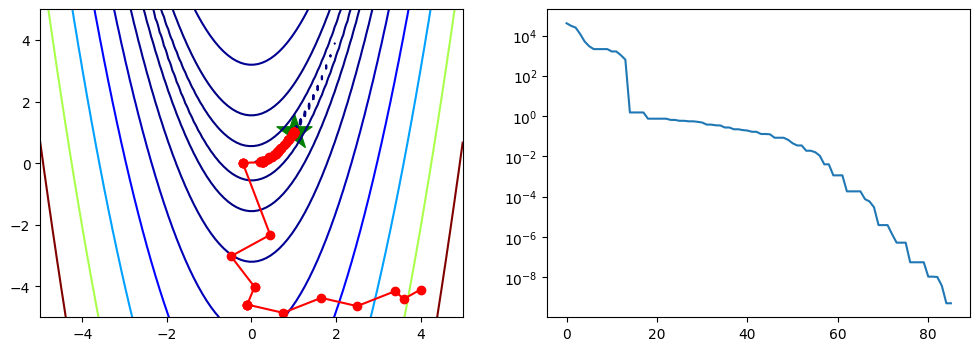

In [22]:
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5, cmap='jet')
plt.plot(ps[:, 0], ps[:, 1], '-ro')
plt.scatter(ps[-1][0],ps[-1][1],marker='*',s=700,c="g")
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T));

https://people.duke.edu/~ccc14/sta-663-2018/notebooks/S09G_Gradient_Descent_Optimization.html

### **13.5. Markowitz com Python**

- Coleta de dados do Yahoo Finance
- Problema de otimização
- Plotagem da Fronteira de Pareto    

#### **13.5.1. Selecionando os Ativos**

In [73]:
# Verique se os arquivos estão em uma pasta chamada 'Arquivos Parte2' no local do notebook
caminho_arquivos = os.path.join(os.getcwd(), 'Arquivos Parte2')
arquivo_nome = 'ibovespa.csv'
caminho_completo = os.path.join(caminho_arquivos, arquivo_nome)

df_ibovespa = pd.read_csv(caminho_completo, sep=';', encoding='latin1', decimal=',')

In [74]:
df_ibovespa.head(10)

,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
0,RRRP3,3R PETROLEUM,ON NM,200.453.863,0.462
1,ALPA4,ALPARGATAS,PN N1,202.765.994,0.172
2,ABEV3,AMBEV S/A,ON,4.386.652.506,3.241
3,AMER3,AMERICANAS,ON NM,596.086.291,0.446
4,ARZZ3,AREZZO CO,ON NM,60.358.029,0.276
5,ASAI3,ASSAI,ON NM,795.949.801,0.735
6,AZUL4,AZUL,PN N2,327.646.296,0.238
7,B3SA3,B3,ON NM,5.901.731.302,4.136
8,BPAN4,BANCO PAN,PN N1,341.549.703,0.118
9,BBSE3,BBSEGURIDADE,ON NM,671.682.536,0.899


In [75]:
ativos = df_ibovespa['Código'].values+'.SA'

In [76]:
ativos

array(['RRRP3.SA', 'ALPA4.SA', 'ABEV3.SA', 'AMER3.SA', 'ARZZ3.SA',
       'ASAI3.SA', 'AZUL4.SA', 'B3SA3.SA', 'BPAN4.SA', 'BBSE3.SA',
       'BRML3.SA', 'BBDC3.SA', 'BBDC4.SA', 'BRAP4.SA', 'BBAS3.SA',
       'BRKM5.SA', 'BRFS3.SA', 'BPAC11.SA', 'CRFB3.SA', 'CCRO3.SA',
       'CMIG4.SA', 'CIEL3.SA', 'COGN3.SA', 'CPLE6.SA', 'CSAN3.SA',
       'CPFE3.SA', 'CMIN3.SA', 'CVCB3.SA', 'CYRE3.SA', 'DXCO3.SA',
       'ECOR3.SA', 'ELET3.SA', 'ELET6.SA', 'EMBR3.SA', 'ENBR3.SA',
       'ENGI11.SA', 'ENEV3.SA', 'EGIE3.SA', 'EQTL3.SA', 'EZTC3.SA',
       'FLRY3.SA', 'GGBR4.SA', 'GOAU4.SA', 'GOLL4.SA', 'NTCO3.SA',
       'SOMA3.SA', 'HAPV3.SA', 'HYPE3.SA', 'IGTI11.SA', 'IRBR3.SA',
       'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA', 'KLBN11.SA', 'RENT3.SA',
       'LWSA3.SA', 'LREN3.SA', 'MGLU3.SA', 'MRFG3.SA', 'CASH3.SA',
       'BEEF3.SA', 'MRVE3.SA', 'MULT3.SA', 'PCAR3.SA', 'PETR3.SA',
       'PETR4.SA', 'PRIO3.SA', 'PETZ3.SA', 'POSI3.SA', 'QUAL3.SA',
       'RADL3.SA', 'RAIZ4.SA', 'RDOR3.SA', 'RAIL3.SA', 'SB

In [77]:
len(ativos)

92

In [78]:
df_ibovespa.head()

,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
0,RRRP3,3R PETROLEUM,ON NM,200.453.863,0.462
1,ALPA4,ALPARGATAS,PN N1,202.765.994,0.172
2,ABEV3,AMBEV S/A,ON,4.386.652.506,3.241
3,AMER3,AMERICANAS,ON NM,596.086.291,0.446
4,ARZZ3,AREZZO CO,ON NM,60.358.029,0.276


In [79]:
df_ibovespa.sort_values(by=['Código'], inplace=True)

In [80]:
df_ibovespa.head()

,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
2,ABEV3,AMBEV S/A,ON,4.386.652.506,3.241
1,ALPA4,ALPARGATAS,PN N1,202.765.994,0.172
3,AMER3,AMERICANAS,ON NM,596.086.291,0.446
4,ARZZ3,AREZZO CO,ON NM,60.358.029,0.276
5,ASAI3,ASSAI,ON NM,795.949.801,0.735


#### **13.5.2. Série Histórica de Retornos**

In [81]:
ativos = df_ibovespa['Código'].values+'.SA'

In [82]:
ativos

array(['ABEV3.SA', 'ALPA4.SA', 'AMER3.SA', 'ARZZ3.SA', 'ASAI3.SA',
       'AZUL4.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA', 'BBDC4.SA',
       'BBSE3.SA', 'BEEF3.SA', 'BPAC11.SA', 'BPAN4.SA', 'BRAP4.SA',
       'BRFS3.SA', 'BRKM5.SA', 'BRML3.SA', 'CASH3.SA', 'CCRO3.SA',
       'CIEL3.SA', 'CMIG4.SA', 'CMIN3.SA', 'COGN3.SA', 'CPFE3.SA',
       'CPLE6.SA', 'CRFB3.SA', 'CSAN3.SA', 'CSNA3.SA', 'CVCB3.SA',
       'CYRE3.SA', 'DXCO3.SA', 'ECOR3.SA', 'EGIE3.SA', 'ELET3.SA',
       'ELET6.SA', 'EMBR3.SA', 'ENBR3.SA', 'ENEV3.SA', 'ENGI11.SA',
       'EQTL3.SA', 'EZTC3.SA', 'FLRY3.SA', 'GGBR4.SA', 'GOAU4.SA',
       'GOLL4.SA', 'HAPV3.SA', 'HYPE3.SA', 'IGTI11.SA', 'IRBR3.SA',
       'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA', 'KLBN11.SA', 'LREN3.SA',
       'LWSA3.SA', 'MGLU3.SA', 'MRFG3.SA', 'MRVE3.SA', 'MULT3.SA',
       'NTCO3.SA', 'PCAR3.SA', 'PETR3.SA', 'PETR4.SA', 'PETZ3.SA',
       'POSI3.SA', 'PRIO3.SA', 'QUAL3.SA', 'RADL3.SA', 'RAIL3.SA',
       'RAIZ4.SA', 'RDOR3.SA', 'RENT3.SA', 'RRRP3.SA', 'SA

In [83]:
data_inicial = '2018-09-28'
data_final = '2022-09-28'

In [133]:
fechamentos = yf.download(
    tickers=ativos.tolist(), 
    start=data_inicial, 
    end=data_final, 
    auto_adjust=False,
    multi_level_index=False,
    rounding=True)['Adj Close']

# Drop colunas com valores faltantes para ativos que não foram encontrados
fechamentos.dropna(axis=1, inplace=True)
fechamentos.head()

# Para o ibovespa ter o mesmo tamanho do 'fechamentos' é necessário retirar 
# os ativos não encontrados no yfinance
ativos = fechamentos.columns.str.rstrip('.SA')
df_ibovespa = df_ibovespa[df_ibovespa['Código'].isin(ativos)]

print(df_ibovespa.shape, fechamentos.shape)

[*****                 11%                       ]  8 of 75 completed

[*********************100%***********************]  75 of 75 completed

75 Failed downloads:
['HYPE3', 'VBBR3', 'IRBR3', 'EQTL3', 'CSAN3', 'BRKM5', 'GGBR4', 'CSNA3', 'BBDC4', 'GOLL4', 'SMTO3', 'BPAN4', 'ABEV3', 'PCAR3', 'YDUQ3', 'PETR3', 'POSI3', 'BRAP4', 'AMER3', 'CVCB3', 'TAEE11', 'SBSP3', 'ELET3', 'BEEF3', 'QUAL3', 'ITUB4', 'TIMS3', 'BBDC3', 'B3SA3', 'CPFE3', 'ELET6', 'EMBR3', 'HAPV3', 'COGN3', 'ENEV3', 'GOAU4', 'CRFB3', 'SLCE3', 'UGPA3', 'RENT3', 'EGIE3', 'MGLU3', 'FLRY3', 'KLBN11', 'PETR4', 'CYRE3', 'SUZB3', 'TOTS3', 'VIVT3', 'BRFS3', 'CMIG4', 'SANB11', 'CCRO3', 'MRFG3', 'AZUL4', 'USIM5', 'ALPA4', 'WEGE3', 'BBSE3', 'MRVE3', 'MULT3', 'LREN3', 'DXCO3', 'EZTC3', 'ENGI11', 'RADL3', 'ITSA4', 'PRIO3', 'VALE3', 'BBAS3', 'CPLE6', 'JBSS3', 'BPAC11', 'ECOR3', 'RAIL3']: YFTzMissingError('possibly delisted; no timezone found')


(75, 5) (0, 75)


In [85]:
retornos = fechamentos.pct_change()
retornos.head()

Ticker,ABEV3.SA,ALPA4.SA,AMER3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,...,TAEE11.SA,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2018-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-01,0.005054,-0.016824,-0.002887,-0.046985,-0.017857,-0.041314,-0.008953,-0.011218,-0.009552,-0.030769,...,-0.012750,-0.011416,0.003861,-0.001406,-0.036641,0.009458,-0.009623,0.002559,-0.012263,-0.022315
2018-10-02,-0.010057,0.037433,0.071688,0.038394,0.041322,0.113812,0.070461,0.059157,0.043769,0.021164,...,0.031365,0.013857,0.011538,0.050704,0.060222,0.013227,0.051822,0.023820,0.012415,0.039467
2018-10-03,-0.006531,0.057732,0.022974,0.029412,0.014286,0.090278,0.048101,0.042846,0.031272,0.015544,...,0.031306,0.034169,0.013942,0.022788,0.044843,-0.020397,0.075443,0.019942,-0.015608,0.007777
2018-10-04,-0.013879,-0.042885,-0.025759,0.012245,0.009390,0.024568,-0.008857,0.005136,0.000000,-0.005102,...,0.021683,-0.017621,-0.020000,-0.005242,0.022890,-0.019156,0.012169,-0.008554,-0.016988,0.007717


In [86]:
retornos.columns = retornos.columns.str.rstrip('.SA')  
retornos.head()

Ticker,ABEV3,ALPA4,AMER3,AZUL4,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BEEF3,...,TAEE11,TIMS3,TOTS3,UGPA3,USIM5,VALE3,VBBR3,VIVT3,WEGE3,YDUQ3
Date,,,,,,,,,,,,,,,,,,,,,
2018-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-01,0.005054,-0.016824,-0.002887,-0.046985,-0.017857,-0.041314,-0.008953,-0.011218,-0.009552,-0.030769,...,-0.012750,-0.011416,0.003861,-0.001406,-0.036641,0.009458,-0.009623,0.002559,-0.012263,-0.022315
2018-10-02,-0.010057,0.037433,0.071688,0.038394,0.041322,0.113812,0.070461,0.059157,0.043769,0.021164,...,0.031365,0.013857,0.011538,0.050704,0.060222,0.013227,0.051822,0.023820,0.012415,0.039467
2018-10-03,-0.006531,0.057732,0.022974,0.029412,0.014286,0.090278,0.048101,0.042846,0.031272,0.015544,...,0.031306,0.034169,0.013942,0.022788,0.044843,-0.020397,0.075443,0.019942,-0.015608,0.007777
2018-10-04,-0.013879,-0.042885,-0.025759,0.012245,0.009390,0.024568,-0.008857,0.005136,0.000000,-0.005102,...,0.021683,-0.017621,-0.020000,-0.005242,0.022890,-0.019156,0.012169,-0.008554,-0.016988,0.007717


In [87]:
retornos = retornos.dropna()
retornos.head()

Ticker,ABEV3,ALPA4,AMER3,AZUL4,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BEEF3,...,TAEE11,TIMS3,TOTS3,UGPA3,USIM5,VALE3,VBBR3,VIVT3,WEGE3,YDUQ3
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-01,0.005054,-0.016824,-0.002887,-0.046985,-0.017857,-0.041314,-0.008953,-0.011218,-0.009552,-0.030769,...,-0.012750,-0.011416,0.003861,-0.001406,-0.036641,0.009458,-0.009623,0.002559,-0.012263,-0.022315
2018-10-02,-0.010057,0.037433,0.071688,0.038394,0.041322,0.113812,0.070461,0.059157,0.043769,0.021164,...,0.031365,0.013857,0.011538,0.050704,0.060222,0.013227,0.051822,0.023820,0.012415,0.039467
2018-10-03,-0.006531,0.057732,0.022974,0.029412,0.014286,0.090278,0.048101,0.042846,0.031272,0.015544,...,0.031306,0.034169,0.013942,0.022788,0.044843,-0.020397,0.075443,0.019942,-0.015608,0.007777
2018-10-04,-0.013879,-0.042885,-0.025759,0.012245,0.009390,0.024568,-0.008857,0.005136,0.000000,-0.005102,...,0.021683,-0.017621,-0.020000,-0.005242,0.022890,-0.019156,0.012169,-0.008554,-0.016988,0.007717
2018-10-05,-0.012593,0.027495,0.032201,0.007661,-0.009302,0.017762,-0.029245,-0.015328,0.002757,-0.010256,...,-0.003396,-0.020179,-0.006378,-0.002635,-0.006993,-0.022078,0.020509,-0.006574,0.000000,-0.003604


In [88]:
retornos.shape

(988, 75)

#### **13.5.3. Modelagem da Otimização**

$$\mathrm{\min} \,\,\, x^TCov\,\, x\,\,\,\,\mathrm{\max} \,\,\, \mu^Tx$$

<center>sujeito a<center>

$$\displaystyle\sum_{i=1}^n x_i=1$$

$$x_i\geq0, i=1,\cdots,n$$
    
$$x_i\leq1, i=1,\cdots,n$$ 

**Otimização ponderada**

$$\mathrm{\min} \,\,\, \alpha x^TCov\,\, x - (1-\alpha) \mu^Tx$$

<center>sujeito a<center>

$$[1,\cdots,1]_{1\times n}x=1$$

$$0\leq x_i\leq 1, i=1,\cdots,n$$

**Código em Python** 
    
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

#### **13.5.4. Parâmetros de Otimização**

In [89]:
[TAM, QTD_ATIVOS] = retornos.shape
QTD_ATIVOS

75

In [90]:
QTD_PTS_FRONTEIRA = 20
PONTOS_FRONT = np.linspace(0, 1, QTD_PTS_FRONTEIRA)
COV = retornos.cov()
COV

Ticker,ABEV3,ALPA4,AMER3,AZUL4,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BEEF3,...,TAEE11,TIMS3,TOTS3,UGPA3,USIM5,VALE3,VBBR3,VIVT3,WEGE3,YDUQ3
Ticker,,,,,,,,,,,,,,,,,,,,,
ABEV3,0.000440,0.000206,0.000242,0.000440,0.000243,0.000254,0.000258,0.000258,0.000160,0.000151,...,0.000093,0.000189,0.000190,0.000347,0.000240,0.000116,0.000252,0.000140,0.000210,0.000307
ALPA4,0.000206,0.000947,0.000486,0.000689,0.000355,0.000300,0.000250,0.000253,0.000136,0.000266,...,0.000119,0.000226,0.000375,0.000462,0.000318,0.000165,0.000366,0.000155,0.000332,0.000445
AMER3,0.000242,0.000486,0.001727,0.000719,0.000481,0.000413,0.000357,0.000337,0.000280,0.000313,...,0.000173,0.000271,0.000517,0.000594,0.000458,0.000291,0.000466,0.000188,0.000375,0.000556
AZUL4,0.000440,0.000689,0.000719,0.002069,0.000639,0.000717,0.000618,0.000623,0.000337,0.000335,...,0.000218,0.000390,0.000568,0.000767,0.000733,0.000401,0.000663,0.000240,0.000475,0.000838
B3SA3,0.000243,0.000355,0.000481,0.000639,0.000717,0.000416,0.000382,0.000366,0.000258,0.000206,...,0.000151,0.000248,0.000367,0.000502,0.000386,0.000246,0.000410,0.000182,0.000336,0.000443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VALE3,0.000116,0.000165,0.000291,0.000401,0.000246,0.000293,0.000268,0.000265,0.000141,0.000205,...,0.000079,0.000147,0.000186,0.000303,0.000538,0.000725,0.000215,0.000113,0.000171,0.000225
VBBR3,0.000252,0.000366,0.000466,0.000663,0.000410,0.000454,0.000374,0.000365,0.000236,0.000170,...,0.000141,0.000240,0.000361,0.000567,0.000384,0.000215,0.000729,0.000178,0.000269,0.000495
VIVT3,0.000140,0.000155,0.000188,0.000240,0.000182,0.000174,0.000172,0.000171,0.000111,0.000105,...,0.000086,0.000236,0.000142,0.000249,0.000129,0.000113,0.000178,0.000327,0.000117,0.000190


In [91]:
MEDIA_RETORNOS = retornos.mean().values
MEDIA_RETORNOS

array([ 1.63764644e-04,  1.25705323e-03,  3.89629172e-04,  6.27470353e-04,
        1.01262890e-03,  8.83744919e-04,  4.54152815e-04,  5.71447147e-04,
        6.80210531e-04,  1.58673933e-03,  2.20249298e-03,  2.50696577e-03,
        1.22338319e-03,  1.56997443e-05,  1.32778971e-04,  9.59042258e-04,
        1.49323215e-03, -6.84899582e-04,  8.35546294e-04,  1.77389690e-03,
        6.39447656e-04,  1.20524387e-03,  1.08734223e-03, -7.23542224e-04,
        1.25078101e-03,  8.16807508e-04,  1.70906054e-04,  6.94841237e-04,
        1.79074630e-03,  1.54783180e-03,  1.33245804e-04,  1.76898443e-03,
        7.07135167e-04,  1.10105379e-03,  9.89464256e-04,  2.29898820e-04,
        9.60847117e-04,  9.87821291e-04,  9.61877586e-04,  9.77173141e-04,
        8.62152834e-04, -1.92122928e-03,  3.64480315e-04,  2.92181391e-04,
        1.58552813e-03,  2.74302923e-04,  5.54997483e-04,  8.60420616e-04,
        1.48213567e-03,  8.34598516e-04,  7.01820277e-04,  1.48618961e-03,
        1.41338095e-03,  

#### **13.5.5. Verificando se a matriz de covariância é Definida Positiva**

In [92]:
def is_pos_def(A):
    M = np.matrix(A)
    return np.all(np.linalg.eigvals(M) > 0)

In [93]:
# A matriz de covariância é positiva definida?
is_pos_def(COV)
# então a função variância é convexa, de forma que está OK utilizar 
# o método de otimização multiobjetivo por escalarização --> o método
# será capaz de gerar a fronteira de Pareto

True

#### **13.5.6. Preparando para o Python**

- Bounds: $lb \leq x \leq ub$
    
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.Bounds.html    

In [94]:
bnds = Bounds(np.zeros(QTD_ATIVOS), np.ones(QTD_ATIVOS))

#### **13.5.7. Restrições de Desigualdade**

$$lb \leq A\cdot x \leq ub$$    
    
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.LinearConstraint.html#scipy.optimize.LinearConstraint    
- Note que temos uma restrição de igualdade: $A\cdot x = 1$    
    
- É possível tratar uma restrição de igualdade como uma restrição de desigualdade? Sim

- Note que $$A\cdot x=1 \,\,\,\Leftrightarrow\,\,\, 1\leq A\cdot x\leq 1$$  

In [95]:
def h(x):
    return sum(x) - 1

In [96]:
cons = ({'type': 'eq', 'fun': h})

#### **13.5.8. Solução Inicial**

In [97]:
x0 = (1/QTD_ATIVOS)*np.ones(QTD_ATIVOS)
x0

array([0.01333333, 0.01333333, 0.01333333, 0.01333333, 0.01333333,
       0.01333333, 0.01333333, 0.01333333, 0.01333333, 0.01333333,
       0.01333333, 0.01333333, 0.01333333, 0.01333333, 0.01333333,
       0.01333333, 0.01333333, 0.01333333, 0.01333333, 0.01333333,
       0.01333333, 0.01333333, 0.01333333, 0.01333333, 0.01333333,
       0.01333333, 0.01333333, 0.01333333, 0.01333333, 0.01333333,
       0.01333333, 0.01333333, 0.01333333, 0.01333333, 0.01333333,
       0.01333333, 0.01333333, 0.01333333, 0.01333333, 0.01333333,
       0.01333333, 0.01333333, 0.01333333, 0.01333333, 0.01333333,
       0.01333333, 0.01333333, 0.01333333, 0.01333333, 0.01333333,
       0.01333333, 0.01333333, 0.01333333, 0.01333333, 0.01333333,
       0.01333333, 0.01333333, 0.01333333, 0.01333333, 0.01333333,
       0.01333333, 0.01333333, 0.01333333, 0.01333333, 0.01333333,
       0.01333333, 0.01333333, 0.01333333, 0.01333333, 0.01333333,
       0.01333333, 0.01333333, 0.01333333, 0.01333333, 0.01333

In [98]:
sum(x0)

0.9999999999999987

#### **13.5.9. Função Objetivo**

In [108]:
# Calcula o retorno de um portfólio --> variável é o vetor de pesos
def calcula_retorno(x):
    return MEDIA_RETORNOS.dot(x)

In [109]:
# Calcula o risco de um portfólio --> variável é o vetor de pesos
def calcula_risco(x):
    return (x.dot(COV.values)).dot(x)

#### **13.5.10. Algoritmo de Otimização**

In [110]:
def realiza_otimização(ponto_front):
    def funcao_objetivo(x):
        retorno = calcula_retorno(x)
        risco = calcula_risco(x)
        return ponto_front*risco - (1-ponto_front)*retorno
    
    xmin = minimize(funcao_objetivo, x0, method='SLSQP', bounds=bnds, constraints=cons)
    return xmin.x

#### **13.5.11. Construção da Fronteira de Pareto**

In [111]:
def constroi_fronteira():
    carteiras_front = []
    retorno = np.zeros(QTD_PTS_FRONTEIRA)
    risco = np.zeros(QTD_PTS_FRONTEIRA)
    pos = 0
    for ponto_front in PONTOS_FRONT:
        carteira = realiza_otimização(ponto_front)
        carteiras_front.append(carteira)
        retorno[pos] = calcula_retorno(carteira)
        risco[pos] = calcula_risco(carteira)
        pos += 1
    return retorno, risco, carteiras_front

In [112]:
retorno, risco, carteiras_front = constroi_fronteira()

In [113]:
retorno

array([0.003366  , 0.00321609, 0.00336386, 0.00322243, 0.00305954,
       0.00323105, 0.00308954, 0.00309975, 0.00312794, 0.00289716,
       0.00277212, 0.0024213 , 0.00229992, 0.00210532, 0.00192347,
       0.00157922, 0.0012652 , 0.00105322, 0.00090147, 0.00079773])

In [114]:
risco

array([0.00145394, 0.0012216 , 0.00144992, 0.00122924, 0.00106473,
       0.00123999, 0.00108988, 0.00109778, 0.00112442, 0.00089814,
       0.00078994, 0.00055036, 0.00048139, 0.00039617, 0.00032991,
       0.00024724, 0.00020465, 0.00018076, 0.00016244, 0.00015691])

In [115]:
carteiras_front

[array([0.00000000e+00, 4.22452809e-17, 0.00000000e+00, 2.85221293e-18,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.14473556e-17, 1.80640504e-16, 4.02455846e-16,
        1.33856564e-17, 0.00000000e+00, 0.00000000e+00, 1.44953358e-17,
        3.33477524e-17, 0.00000000e+00, 4.59747905e-18, 1.66288441e-16,
        2.16172533e-18, 8.57939584e-18, 0.00000000e+00, 0.00000000e+00,
        1.75150126e-17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.11747073e-16, 5.28036513e-17, 0.00000000e+00, 1.28739564e-16,
        0.00000000e+00, 1.47817087e-18, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.17867544e-18, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.16939787e-17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.48956867e-17, 0.00000000e+00, 2.57667324e-18, 4.65778297e-17,
        3.08089235e-17, 9.88176352e-17, 2.66720202e-01, 7.332797

#### **13.5.12. Gráfico da Fronteira de Pareto**

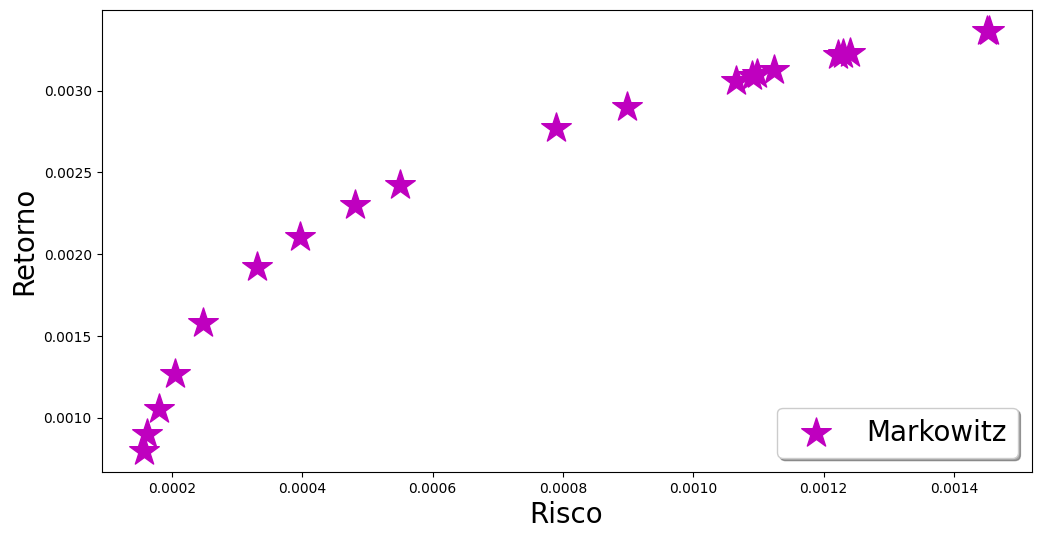

In [ ]:
plt.figure(figsize = (12,6))
plt.scatter(risco,retorno,marker='*',s=500,c="m", label='Markowitz')
plt.xlabel('Risco', fontsize=20)
plt.ylabel('Retorno', fontsize=20)
legend = plt.legend(loc='lower right', shadow=True, fontsize=20, ncol = 2)
plt.show();

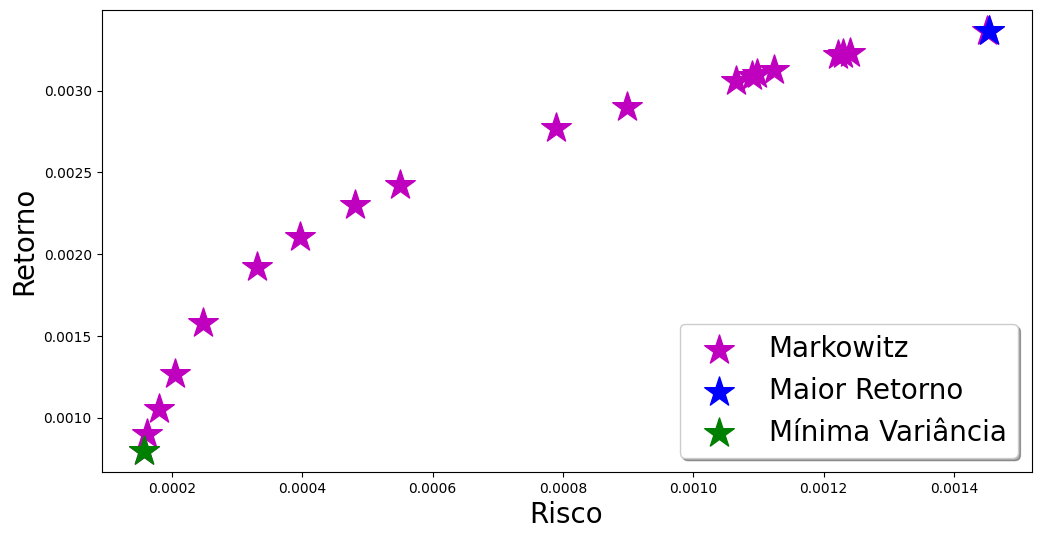

In [158]:
plt.figure(figsize = (12,6))
plt.scatter(risco,retorno,marker='*',s=500,c="m", label='Markowitz')
plt.scatter(risco[0],retorno[0],marker='*',s=500,c="b", label='Maior Retorno')
plt.scatter(risco[-1],retorno[-1],marker='*',s=500,c="g", label='Mínima Variância')
plt.xlabel('Risco', fontsize=20)
plt.ylabel('Retorno', fontsize=20)
legend = plt.legend(loc='lower right', shadow=True, fontsize=20, ncol = 1)
plt.show();

#### **13.5.13. Comparando com o Ibovespa**

In [134]:
df_ibovespa.head()

,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
2,ABEV3,AMBEV S/A,ON,4.386.652.506,3.241
1,ALPA4,ALPARGATAS,PN N1,202.765.994,0.172
3,AMER3,AMERICANAS,ON NM,596.086.291,0.446
6,AZUL4,AZUL,PN N2,327.646.296,0.238
7,B3SA3,B3,ON NM,5.901.731.302,4.136


In [142]:
portfolio_ibovespa = df_ibovespa['Part. (%)'].values/100

In [140]:
risco_ibovespa = calcula_risco(portfolio_ibovespa)

In [141]:
retorno_ibovespa = calcula_retorno(portfolio_ibovespa)

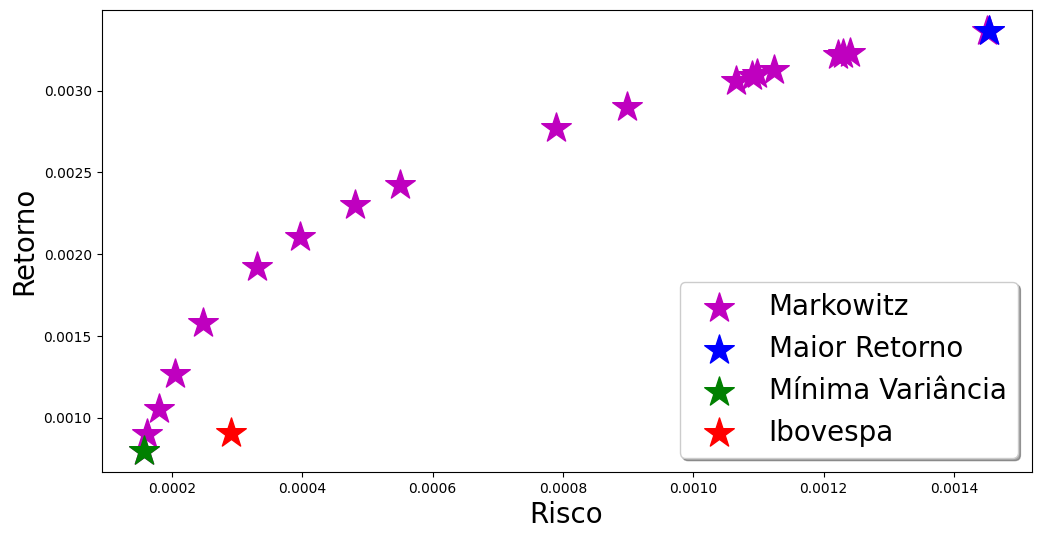

In [157]:
plt.figure(figsize = (12,6))
plt.scatter(risco,retorno,marker='*',s=500,c="m", label='Markowitz')
plt.scatter(risco[0],retorno[0],marker='*',s=500,c="b", label='Maior Retorno')
plt.scatter(risco[-1],retorno[-1],marker='*',s=500,c="g", label='Mínima Variância')
plt.scatter(risco_ibovespa,retorno_ibovespa,marker='*',s=500,c="r", label='Ibovespa')
plt.xlabel('Risco', fontsize=20)
plt.ylabel('Retorno', fontsize=20)
legend = plt.legend(loc='lower right', shadow=True, fontsize=20, ncol = 1)
plt.show();

#### **13.5.14. Otimizando o Índice Sharpe**

$$ IS = \dfrac{R_p-R_f}{\sigma_p}$$
    
- $R_p$: Retorno do portfólio
- $R_f$: Retorno do ativo livre de risco
- $\sigma_p$: Desvio padrão do portfólio  

In [145]:
# Obtém informações do ativo livre de risco
def consulta_bc(codigo_bcb):
    url = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_bcb}/dados?formato=json'
    df = pd.read_json(url)
    df['data'] = pd.to_datetime(df['data'], dayfirst=True)
    df.set_index('data', inplace=True)
    return df

selic = consulta_bc(432) #puxa base histórica
selic = selic/100
selic = selic.loc[data_inicial:data_final] #utiliza apenas as datas do dataframe
selic.rename({'valor': 'Selic'}, axis=1, inplace=True)

In [146]:
selic

,Selic
data,
2018-09-28,0.0650
2018-09-29,0.0650
2018-09-30,0.0650
2018-10-01,0.0650
2018-10-02,0.0650
...,...
2022-09-24,0.1375
2022-09-25,0.1375
2022-09-26,0.1375


In [148]:
RF = (1 + selic['Selic'].mean())**(1/252) - 1
RF

0.00023249455807916597

In [149]:
def calcula_indice_sharpe(x):
    retorno = calcula_retorno(x)
    risco = calcula_risco(x)
    return -1*(retorno - RF)/risco

In [150]:
umin_sharpe = minimize(calcula_indice_sharpe, x0, method='SLSQP', bounds=bnds, constraints=cons)
umin_sharpe.x

array([0.00000000e+00, 0.00000000e+00, 2.16240405e-12, 4.05331268e-12,
       0.00000000e+00, 1.79009249e-13, 4.56394810e-14, 0.00000000e+00,
       0.00000000e+00, 3.91611843e-02, 0.00000000e+00, 0.00000000e+00,
       4.34204232e-02, 8.07607536e-13, 3.08471248e-12, 3.60055767e-13,
       0.00000000e+00, 3.85234853e-12, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.00564694e-13, 5.57188214e-12,
       1.30157384e-12, 5.99450452e-13, 2.25205286e-12, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.29189937e-12, 7.20834729e-02,
       0.00000000e+00, 0.00000000e+00, 1.51623638e-12, 0.00000000e+00,
       0.00000000e+00, 2.03001656e-13, 3.34623950e-12, 0.00000000e+00,
       0.00000000e+00, 3.77953576e-12, 0.00000000e+00, 0.00000000e+00,
       2.98500909e-02, 0.00000000e+00, 7.83837646e-13, 1.67718744e-12,
       0.00000000e+00, 1.28514470e-12, 5.26108943e-13, 3.60797351e-02,
       3.26673914e-13, 1.41239055e-13, 2.86664650e-02, 3.76649965e-02,
      

In [151]:
carteira_sharpe_otimo = umin_sharpe.x

In [152]:
risco_sharpe = calcula_risco(carteira_sharpe_otimo)

In [153]:
retorno_sharpe = calcula_retorno(carteira_sharpe_otimo)

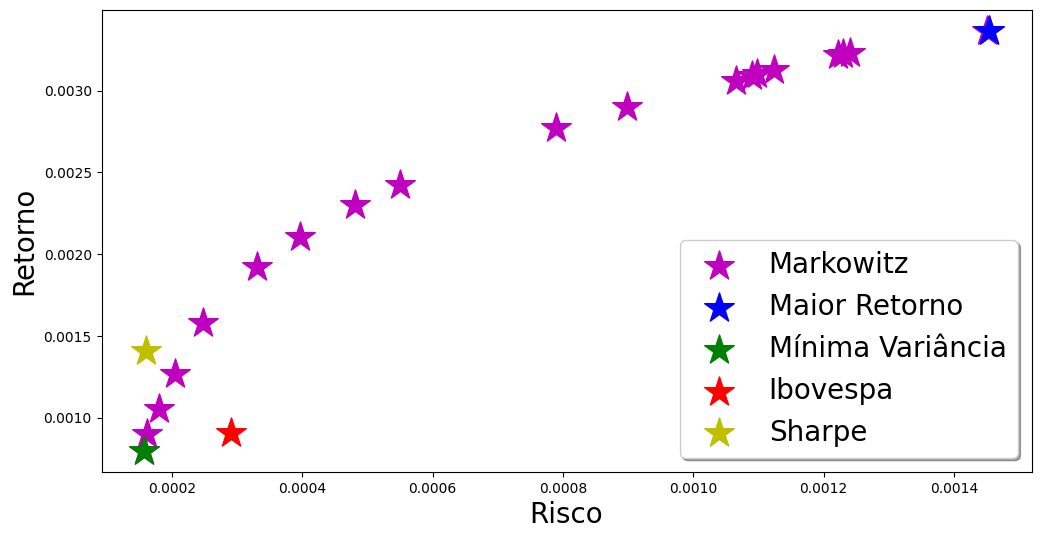

In [156]:
plt.figure(figsize = (12,6))
plt.scatter(risco,retorno,marker='*',s=500,c="m", label='Markowitz')
plt.scatter(risco[0],retorno[0],marker='*',s=500,c="b", label='Maior Retorno')
plt.scatter(risco[-1],retorno[-1],marker='*',s=500,c="g", label='Mínima Variância')
plt.scatter(risco_ibovespa,retorno_ibovespa,marker='*',s=500,c="r", label='Ibovespa')
plt.scatter(risco_sharpe,retorno_sharpe,marker='*',s=500,c="y", label='Sharpe')
plt.xlabel('Risco', fontsize=20)
plt.ylabel('Retorno', fontsize=20)
legend = plt.legend(loc='lower right', shadow=True, fontsize=20, ncol = 1)
plt.show();

#### **13.5.15. Deixando tudo em um DataFrame**

In [159]:
QTD_PTS_FRONTEIRA

20

In [160]:
len(carteiras_front)

20

In [164]:
carteiras = ['Carteira_' + str(i) for i in range(QTD_PTS_FRONTEIRA)]

In [162]:
nome_ativos = df_ibovespa['Código'].values.tolist()

In [165]:
df_carteiras = pd.DataFrame([], index=carteiras, columns=nome_ativos)

In [169]:
for posicao, carteira in enumerate(carteiras):
    df_carteiras.loc[carteira] = carteiras_front[posicao].round(4)

#### **13.5.16. Salvando no Excel**

In [170]:
writer_portfolio = pd.ExcelWriter('carteiras_otimas.xlsx', engine='xlsxwriter')
df_carteiras.to_excel(writer_portfolio, index=True, sheet_name='Carteiras Ótimas')
fechamentos.to_excel(writer_portfolio, index=True, sheet_name='Fechamentos')
retornos.to_excel(writer_portfolio, index=True, sheet_name='Retornos')
writer_portfolio.close()

## **14. Modelos de Otimização de Portfólio**

### **14.1. Construindo o Portfólio**

- Pesos 1/n
- In Sample 2016 a 2018
- Out of Sample 2019 a 2020

In [3]:
# Pegando o caminho do arquivo. Verifique se os arquivos estão em uma pasta chamada 'Arquivos alunos' no local do notebook
caminho_arquivos = os.path.join(os.getcwd(), 'Arquivos alunos')
arquivo1= 'Analise_quant_carteira_futuro.csv'
arquivo2 = 'Analise_quant_carteira_passado.csv'

carteira_futuro = pd.read_csv(os.path.join(caminho_arquivos, arquivo1))
carteira_passado = pd.read_csv(os.path.join(caminho_arquivos, arquivo2))

In [4]:
carteira_futuro

,Date,ABEV3,ITSA4,PETR4,VALE3
0,2019-01-02,14.685471,9.976937,12.641032,37.180225
1,2019-01-03,14.849148,10.063695,12.951014,35.659252
2,2019-01-04,15.049198,10.032147,12.987795,37.980740
3,2019-01-07,14.985545,10.024258,13.192698,37.776974
4,2019-01-08,14.685471,10.158334,13.113889,38.140846
...,...,...,...,...,...
491,2020-12-22,14.856628,9.996698,14.809987,67.661163
492,2020-12-23,14.847050,10.233462,15.173724,67.988029
493,2020-12-28,15.105676,10.347463,15.298587,67.949104
494,2020-12-29,15.278091,10.408841,15.347447,67.762329


In [5]:
carteira_passado

,Date,ABEV3,ITSA4,PETR4,VALE3
0,2016-01-04,14.220700,3.496322,3.459997,8.448510
1,2016-01-05,14.443802,3.554593,3.364306,8.335332
2,2016-01-06,14.303330,3.586378,3.223287,7.722830
3,2016-01-07,13.923230,3.533406,3.152778,7.263454
4,2016-01-08,14.105017,3.533406,3.157814,7.017124
...,...,...,...,...,...
744,2018-12-20,13.830713,9.369647,10.915334,36.248722
745,2018-12-21,13.794341,9.267114,10.945807,37.012852
746,2018-12-26,13.767061,9.148813,11.390590,36.707195
747,2018-12-27,13.730689,9.306550,11.385335,36.023121


In [6]:
carteira_passado.index = carteira_passado['Date']
carteira_futuro.index = carteira_futuro['Date']

In [7]:
carteira_passado.drop(columns={'Date'}, inplace=True)
carteira_futuro.drop(columns={'Date'}, inplace=True)

In [8]:
carteira_passado

,ABEV3,ITSA4,PETR4,VALE3
Date,,,,
2016-01-04,14.220700,3.496322,3.459997,8.448510
2016-01-05,14.443802,3.554593,3.364306,8.335332
2016-01-06,14.303330,3.586378,3.223287,7.722830
2016-01-07,13.923230,3.533406,3.152778,7.263454
2016-01-08,14.105017,3.533406,3.157814,7.017124
...,...,...,...,...
2018-12-20,13.830713,9.369647,10.915334,36.248722
2018-12-21,13.794341,9.267114,10.945807,37.012852
2018-12-26,13.767061,9.148813,11.390590,36.707195


#### **14.1.1. Criando os Pesos**

In [9]:
pesos = np.array([0.25,0.25,0.25,0.25])

#### **14.1.2. Anualizando Retornos**

In [10]:
# Houve um erro de gravação - trocamos 48 por 24 meses
cf_anualizado = (carteira_futuro.iloc[-1]-carteira_futuro.iloc[0])/carteira_futuro.iloc[0]
cf_anualizado = ((1+cf_anualizado)**(12/24))-1
cf_anualizado

ABEV3    0.010340
ITSA4    0.015375
PETR4    0.103224
VALE3    0.352956
dtype: float64

In [11]:
cf_anualizado_carteira = cf_anualizado.dot(pesos)
cf_anualizado_carteira

0.12047374254987658

### **14.2. Volatilidade**

In [12]:
carteira_futuro_retornos = carteira_futuro.pct_change()

carteira_futuro_retornos

,ABEV3,ITSA4,PETR4,VALE3
Date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,0.011146,0.008696,0.024522,-0.040908
2019-01-04,0.013472,-0.003135,0.002840,0.065102
2019-01-07,-0.004230,-0.000786,0.015777,-0.005365
2019-01-08,-0.020024,0.013375,-0.005974,0.009632
...,...,...,...,...
2020-12-22,0.005837,0.001757,0.009622,0.000921
2020-12-23,-0.000645,0.023684,0.024560,0.004831
2020-12-28,0.017419,0.011140,0.008229,-0.000573


In [13]:
cov_fut = carteira_futuro_retornos.cov()

cov_fut

,ABEV3,ITSA4,PETR4,VALE3
ABEV3,0.000564,0.000299,0.000384,0.000207
ITSA4,0.000299,0.000501,0.000477,0.000313
PETR4,0.000384,0.000477,0.001090,0.000633
VALE3,0.000207,0.000313,0.000633,0.000917


In [14]:
vol_fut_diaria  = np.sqrt(np.dot(pesos.T, np.dot(cov_fut, pesos)))

vol_fut_diaria

0.021934372367607948

In [15]:
vol_fut_ano = vol_fut_diaria*np.sqrt(252)
vol_fut_ano

0.348197366693866

### **14.3. Estimando Retornos**

#### **14.3.1. Retorno Médio Histórico**

In [16]:
retorno_medio = expected_returns.mean_historical_return(carteira_passado)
retorno_medio

ABEV3   -0.005608
ITSA4    0.401757
PETR4    0.516815
VALE3    0.646444
dtype: float64

In [17]:
# EMA

ema_retorno_medio = np.sum(np.abs(retorno_medio-cf_anualizado))/len(retorno_medio)
ema_retorno_medio

0.27735218711674264

#### **14.3.2. Média Móvel Exponencial**

In [18]:
mme = expected_returns.ema_historical_return(carteira_passado, span=200)
mme

ABEV3   -0.287982
ITSA4    0.476077
PETR4    0.495335
VALE3    0.155658
Name: 2018-12-28, dtype: float64

In [19]:
# EMA MME

ema_mme = np.sum(np.abs(mme-cf_anualizado))/len(mme)
ema_mme

0.3371085708076097

#### **14.3.3. CAPM - Capital Asset Pricing Model**

$$R_i = R_f + \beta_i(R_m - R_f)$$

- Ri retorno esperado do ativo
- Rf taxa livre de risco
- B beta de um investimento
- Rm - Rf prêmio de risco

In [20]:
# Taxa de livre risco

selic_aa = 0.1375
selic_diaria = (1+selic_aa)**(1/252)-1
selic_diaria

0.0005113722611693738

In [21]:
# Ibovespa
caminho_arquivos = os.path.join(os.getcwd(), 'Arquivos alunos')
arquivo_nome = 'ibov.csv'
ibov = pd.read_csv(os.path.join(caminho_arquivos, arquivo_nome))
ibov.index = ibov['Date']
ibov.drop(columns={'Date'},inplace=True)
ibov

,Close
Date,
2016-01-04,42141.0
2016-01-05,42419.0
2016-01-06,41773.0
2016-01-07,40695.0
2016-01-08,40612.0
...,...
2018-12-20,85269.0
2018-12-21,85697.0
2018-12-26,85136.0


In [22]:
# Calcular os retornos CAPM

capm = expected_returns.capm_return(carteira_passado, market_prices=ibov, risk_free_rate=selic_diaria)
capm

d:\current_projects\material_PMF_2.0\.venv\Lib\site-packages\pypfopt\expected_returns.py:32: UserWarning: Some returns are NaN. Please check your price data.
  warnings.warn(


ABEV3    0.135137
ITSA4    0.319222
PETR4    0.515588
VALE3    0.341307
Name: mkt, dtype: float64

In [23]:
# EMA CAPM

ema_capm = np.sum(np.abs(capm-cf_anualizado))/len(capm)
ema_capm

0.21316423398451714

### **14.4. Estimando Matrizes de Covariância**

#### **14.4.1. Sample Covariance**

In [24]:
sample_cov = risk_models.sample_cov(carteira_passado)
sample_cov

,ABEV3,ITSA4,PETR4,VALE3
ABEV3,0.040229,0.024976,0.034766,0.026718
ITSA4,0.024976,0.091104,0.092646,0.042213
PETR4,0.034766,0.092646,0.269322,0.107718
VALE3,0.026718,0.042213,0.107718,0.235897


In [25]:
# EMA Sample Covariance

ema_sample_cov = np.sum(np.abs(np.diag(sample_cov)-np.diag(cov_fut)))/len(np.diag(sample_cov))
ema_sample_cov

0.15836997088879062

#### **14.4.1. Semicovariance**

- Estrada (2006) - Mean Semivariance Optimization: A Heuristic Approach
- Rigamonti (2020) - Mean Variance Optimization is a Good Choice, But for Other Reason than you might think

In [26]:
semicov = risk_models.semicovariance(carteira_passado, benchmark=0)
semicov

,ABEV3,ITSA4,PETR4,VALE3
ABEV3,0.019784,0.015500,0.024468,0.019488
ITSA4,0.015500,0.040263,0.044719,0.027125
PETR4,0.024468,0.044719,0.122588,0.056059
VALE3,0.019488,0.027125,0.056059,0.103839


In [27]:
# EMA Semivariance

ema_semicov = np.sum(np.abs(np.diag(semicov)-np.diag(cov_fut)))/len(np.diag(semicov))
ema_semicov

0.07085017643436273

#### **14.4.1. Exponentially-Weighted Covariance**

In [28]:
exp_cov = risk_models.exp_cov(carteira_passado, span=400)
exp_cov

,ABEV3,ITSA4,PETR4,VALE3
ABEV3,0.046359,0.027943,0.031752,0.020778
ITSA4,0.027943,0.092008,0.083297,0.024562
PETR4,0.031752,0.083297,0.241826,0.045649
VALE3,0.020778,0.024562,0.045649,0.130017


In [29]:
# EMA expcov

ema_exp_cov = np.sum(np.abs(np.diag(exp_cov)-np.diag(cov_fut)))/len(np.diag(exp_cov))
ema_exp_cov

0.1267843682084485

#### **14.4.1. Matriz de Covariância - Ledoit Wolf**

- constant_variance = diagonal da matriz de covariancia como sendo a média das variancias do retorno
- single_factor: baseado no Sharpe Model factor - utiliza o beta como parametro da função que irá encolher a matriz
- constant_correlation: relacionado a matriz de correlação e desvio padrão da amostra

Referências

- Robert Martin:https://reasonabledeviations.com/notes/papers/ledoit_wolf_covariance/
- Honey, I Shrunk the Sample Covariance Matrix: https://jpm.pm-research.com/content/30/4/110


In [30]:
lw_cov = risk_models.CovarianceShrinkage(carteira_passado).ledoit_wolf()
lw_cov

,ABEV3,ITSA4,PETR4,VALE3
ABEV3,0.042577,0.024439,0.034017,0.026142
ITSA4,0.024439,0.092356,0.090651,0.041304
PETR4,0.034017,0.090651,0.266737,0.105399
VALE3,0.026142,0.041304,0.105399,0.234032


In [31]:
# EMA Ledoit Wolf

ema_lw = np.sum(np.abs(np.diag(lw_cov)-np.diag(cov_fut)))/len(lw_cov)
ema_lw

0.15815721945887223

### **14.5. Modelos de Otimização**

#### **14.5.1. Portfólio de Mínima Variância**

In [32]:
mv = EfficientFrontier(capm, semicov)

In [33]:
mv.min_volatility()

OrderedDict([('ABEV3', 0.8525306731968944),
             ('ITSA4', 0.1474693268031056),
             ('PETR4', 0.0),
             ('VALE3', 0.0)])

In [34]:
pesos_vol = mv.clean_weights()
pesos_vol

OrderedDict([('ABEV3', 0.85253),
             ('ITSA4', 0.14747),
             ('PETR4', 0.0),
             ('VALE3', 0.0)])

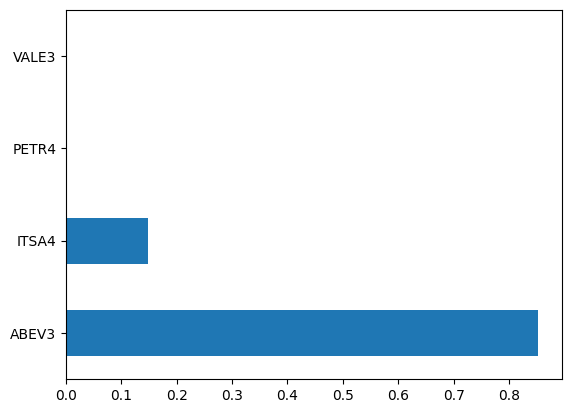

In [35]:
pd.Series(pesos_vol).plot.barh();

In [36]:
mv.portfolio_performance(verbose=True, risk_free_rate=selic_aa)

Expected annual return: 16.2%
Annual volatility: 13.8%
Sharpe Ratio: 0.18


(0.1622838874215592, 0.13839055349343218, 0.17908655465226814)

In [37]:
pesos_vol = pesos_vol.values()
pesos_vol = list(pesos_vol)
pesos_vol = np.array(pesos_vol)
pesos_vol

array([0.85253, 0.14747, 0.     , 0.     ])

In [38]:
# Comparar a volatilidade
vol_otimizada = np.sqrt(np.dot(pesos_vol.T, np.dot(cov_fut,pesos_vol)))
vol_otimizada = vol_otimizada*np.sqrt(252)
vol_otimizada

0.35367156574132075

In [39]:
# Comparar o retorno

retorno_min_vol = cf_anualizado.dot(pesos_vol)
retorno_min_vol

0.011082268036637467

#### **14.5.2. Função Regularizadora**

In [40]:
mv_2 = EfficientFrontier(capm, semicov)
mv_2.add_objective(objective_functions.L2_reg, gamma=0.1)
mv_2.min_volatility()
pesos_2 = mv_2.clean_weights()
pesos_2

OrderedDict([('ABEV3', 0.40077),
             ('ITSA4', 0.3054),
             ('PETR4', 0.11471),
             ('VALE3', 0.17912)])

In [41]:
pesos_2 = pesos_2.values()
pesos_2 = list(pesos_2)
pesos_2 = np.array(pesos_2)
pesos_2

array([0.40077, 0.3054 , 0.11471, 0.17912])

In [42]:
vol_otimizada2 = np.sqrt(np.dot(pesos_2.T, np.dot(cov_fut, pesos_2)))
vol_otimizada2 = vol_otimizada2*np.sqrt(252)
vol_otimizada2

0.3226528084555869

In [43]:
retorno_min_vol2 = cf_anualizado.dot(pesos_2)
retorno_min_vol2

0.08390166049621134

#### **14.5.3. Risco Eficiente**

In [44]:
risco_eficiente = EfficientFrontier(capm, semicov)
risco_eficiente.efficient_risk(target_volatility=0.25)
re_pesos = risco_eficiente.clean_weights(rounding=2)
re_pesos

OrderedDict([('ABEV3', 0.0),
             ('ITSA4', 0.44),
             ('PETR4', 0.49),
             ('VALE3', 0.07)])

In [45]:
risco_eficiente.portfolio_performance(verbose=True, risk_free_rate=selic_aa)

Expected annual return: 41.7%
Annual volatility: 25.0%
Sharpe Ratio: 1.12


(0.416906635069452, 0.24999999973490053, 1.117626541462937)

In [46]:
re_pesos = re_pesos.values()
re_pesos = list(re_pesos)
re_pesos = np.array(re_pesos)
re_pesos

array([0.  , 0.44, 0.49, 0.07])

In [47]:
# volatilidade risco eficiente

vol_re_otimizada = np.sqrt(np.dot(re_pesos.T, np.dot(cov_fut, re_pesos)))
vol_re_otimizada = vol_re_otimizada*np.sqrt(252)
vol_re_otimizada

0.3988690118961109

In [48]:
# retornos risco eficiente

retorno_re_pesos = cf_anualizado.dot(re_pesos)
retorno_re_pesos

0.08205162576032714

#### **14.5.4. Retorno Eficiente**

In [49]:
retorno_eficiente = EfficientFrontier(capm, semicov)
retorno_eficiente.efficient_return(target_return=0.25)
pesos_retorno_eficiente = retorno_eficiente.clean_weights()
pesos_retorno_eficiente

OrderedDict([('ABEV3', 0.43499),
             ('ITSA4', 0.45235),
             ('PETR4', 0.048),
             ('VALE3', 0.06466)])

In [50]:
pesos_retorno_eficiente = pesos_retorno_eficiente.values()
pesos_retorno_eficiente = list(pesos_retorno_eficiente)
pesos_retorno_eficiente = np.array(pesos_retorno_eficiente)
pesos_retorno_eficiente

array([0.43499, 0.45235, 0.048  , 0.06466])

In [51]:
retorno_eficiente_2 = cf_anualizado.dot(pesos_retorno_eficiente)
retorno_eficiente_2

0.03922929238391204

#### **14.5.4. Max Sharpe**

$$\mathrm{max} \,\,\, \dfrac{R_p-R_f}{\sigma_p}$$

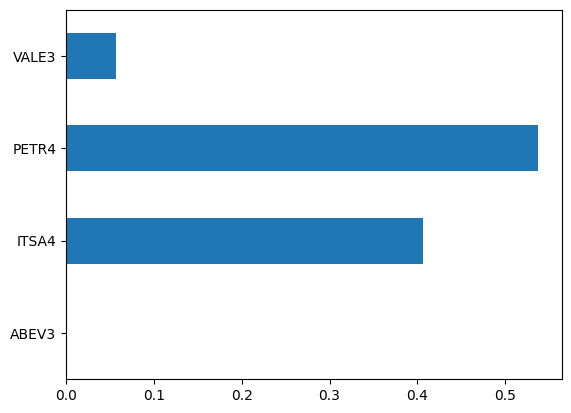

In [52]:
msharpe = EfficientFrontier(capm, semicov)
msharpe.max_sharpe(risk_free_rate=selic_aa)
sharpe_pesos = msharpe.clean_weights()
pd.Series(sharpe_pesos).plot.barh();

In [53]:
sharpe_pesos = sharpe_pesos.values()
sharpe_pesos = list(sharpe_pesos)
sharpe_pesos = np.array(sharpe_pesos)

In [54]:
volsharpe = np.sqrt(np.dot(sharpe_pesos.T, np.dot(cov_fut,sharpe_pesos)))
volsharpe = volsharpe*np.sqrt(252)
volsharpe

0.4081621131388216

In [55]:
retorno_sharpe = cf_anualizado.dot(sharpe_pesos)
retorno_sharpe

0.08166098510343961

### **14.6. Cenários Avançados**

#### **14.6.1. Criando Nova Carteira**

In [56]:
caminho_arquivos = os.path.join(os.getcwd(), 'Arquivos alunos')
arquivo_nome = 'Analise_Quant_Cenarios_Avancados_carteira.csv'

carteira = pd.read_csv(os.path.join(caminho_arquivos, arquivo_nome))
carteira

,Date,ABEV3.SA,BBAS3.SA,BBDC4.SA,BRML3.SA,IGTI3.SA,ITSA4.SA,LREN3.SA,PETR4.SA,RENT3.SA,VALE3.SA
0,2017-01-02,13.968292,20.327692,11.674997,9.589640,0.389289,5.180371,17.249983,7.383342,9.875713,16.782000
1,2017-01-03,14.250914,21.257721,12.169473,10.113577,0.389289,5.407523,17.779266,7.806399,10.291206,17.525339
2,2017-01-04,14.139579,21.147001,12.092402,10.097701,0.389289,5.439075,17.622713,7.806399,10.455140,17.210592
3,2017-01-05,14.216657,21.095325,12.226265,10.327916,0.389289,5.489550,17.458715,7.932308,10.296860,17.866869
4,2017-01-06,14.096757,21.324148,12.303336,10.224716,0.389289,5.470621,17.257442,7.886981,10.294032,17.391401
...,...,...,...,...,...,...,...,...,...,...,...
1238,2021-12-23,15.550000,27.709494,17.110479,7.686333,2.894743,8.637448,23.707630,18.922455,53.839500,72.463852
1239,2021-12-27,15.530000,27.766392,17.306129,7.855372,3.033149,8.733527,23.903805,19.202986,54.134506,72.280739
1240,2021-12-28,15.520000,27.605179,17.243877,8.074129,2.777932,8.723918,23.992083,19.223024,52.659454,70.541245
1241,2021-12-29,15.450000,27.462931,17.163837,8.113903,2.660140,8.675880,23.442795,19.062719,51.233566,70.724350


In [57]:
carteira.index = carteira['Date']
carteira.drop(columns={'Date'},inplace=True)
carteira

,ABEV3.SA,BBAS3.SA,BBDC4.SA,BRML3.SA,IGTI3.SA,ITSA4.SA,LREN3.SA,PETR4.SA,RENT3.SA,VALE3.SA
Date,,,,,,,,,,
2017-01-02,13.968292,20.327692,11.674997,9.589640,0.389289,5.180371,17.249983,7.383342,9.875713,16.782000
2017-01-03,14.250914,21.257721,12.169473,10.113577,0.389289,5.407523,17.779266,7.806399,10.291206,17.525339
2017-01-04,14.139579,21.147001,12.092402,10.097701,0.389289,5.439075,17.622713,7.806399,10.455140,17.210592
2017-01-05,14.216657,21.095325,12.226265,10.327916,0.389289,5.489550,17.458715,7.932308,10.296860,17.866869
2017-01-06,14.096757,21.324148,12.303336,10.224716,0.389289,5.470621,17.257442,7.886981,10.294032,17.391401
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,15.550000,27.709494,17.110479,7.686333,2.894743,8.637448,23.707630,18.922455,53.839500,72.463852
2021-12-27,15.530000,27.766392,17.306129,7.855372,3.033149,8.733527,23.903805,19.202986,54.134506,72.280739
2021-12-28,15.520000,27.605179,17.243877,8.074129,2.777932,8.723918,23.992083,19.223024,52.659454,70.541245


In [58]:
# Matriz de Covariância
cov_matrix = risk_models.CovarianceShrinkage(carteira).ledoit_wolf()

In [59]:
# Ibovespa
camino_completo = os.path.join(caminho_arquivos, 'ibov2.csv')
ibov2 = pd.read_csv(camino_completo)
ibov2.index = ibov2['Date']
ibov2.drop(columns={'Date'},inplace=True)
ibov2

,Close
Date,
2017-01-02,59589.0
2017-01-03,61814.0
2017-01-04,61589.0
2017-01-05,62071.0
2017-01-06,61665.0
...,...
2020-12-22,116348.0
2020-12-23,117857.0
2020-12-28,119051.0


In [60]:
# Retornos Esperados
capm_carteira = expected_returns.capm_return(carteira, market_prices=ibov2, risk_free_rate=selic_diaria)
capm_carteira

d:\current_projects\material_PMF_2.0\.venv\Lib\site-packages\pypfopt\expected_returns.py:32: UserWarning: Some returns are NaN. Please check your price data.
  warnings.warn(


ABEV3.SA    0.126250
BBAS3.SA    0.259043
BBDC4.SA    0.225226
BRML3.SA    0.216765
IGTI3.SA    0.143956
ITSA4.SA    0.184325
LREN3.SA    0.210219
PETR4.SA    0.272625
RENT3.SA    0.225462
VALE3.SA    0.183633
Name: mkt, dtype: float64

#### **14.6.2. Mínimia Variância com operações compradas e vendidas**

In [61]:
ls = EfficientFrontier(capm_carteira, cov_matrix, weight_bounds=(None, None))
ls.min_volatility()
ls_pesos = ls.clean_weights()
ls_pesos

OrderedDict([('ABEV3.SA', 0.31606),
             ('BBAS3.SA', -0.00729),
             ('BBDC4.SA', 0.05483),
             ('BRML3.SA', 0.06785),
             ('IGTI3.SA', 0.02809),
             ('ITSA4.SA', 0.21833),
             ('LREN3.SA', 0.07336),
             ('PETR4.SA', -0.00505),
             ('RENT3.SA', 0.04779),
             ('VALE3.SA', 0.20604)])

#### **14.6.3. Restrições Setoriais**

In [62]:
ativos = ['ITSA4.SA', 'PETR4.SA', 'VALE3.SA', 'ABEV3.SA', 'IGTI3.SA', 'BRML3.SA','BBDC4.SA','BBAS3.SA','LREN3.SA','RENT3.SA']

retornos_estimados = np.array([0.15,0.1,0.14,0.08,0.1,0.09,0.08,0.1,0.07,0.09])

retorno_analista = pd.Series(data=retornos_estimados, index=ativos)
retorno_analista

ITSA4.SA    0.15
PETR4.SA    0.10
VALE3.SA    0.14
ABEV3.SA    0.08
IGTI3.SA    0.10
BRML3.SA    0.09
BBDC4.SA    0.08
BBAS3.SA    0.10
LREN3.SA    0.07
RENT3.SA    0.09
dtype: float64

In [63]:
sector_mapper = {"ITSA4.SA": "Bancos",
                 "PETR4.SA": "Commodities",
                 "VALE3.SA": "Commodities",
                 "ABEV3.SA": "Varejo",
                 "IGTI3.SA": "Shoppings",
                 "BRML3.SA": "Shoppings",
                 "BBDC4.SA": "Bancos",
                 "BBAS3.SA": "Bancos",
                 "LREN3.SA": "Varejo",
                 "RENT3.SA": "Varejo"}

In [64]:
# Pelo menos 5% em commodities e menos que 10% de exposição em varejo

sector_lower = {"Commodities":0.05}
sector_upper = {"Varejo": 0.10}

In [65]:
restrição_setorial = EfficientFrontier(retorno_analista, cov_matrix)
restrição_setorial.add_objective(objective_functions.L2_reg, gamma=0.01)
restrição_setorial.add_sector_constraints(sector_mapper,sector_lower, sector_upper)
restrição_setorial.efficient_risk(target_volatility=0.30)
pesos_restricao = restrição_setorial.clean_weights()
pesos_restricao

OrderedDict([('ITSA4.SA', 0.61705),
             ('PETR4.SA', 0.0),
             ('VALE3.SA', 0.37062),
             ('ABEV3.SA', 0.0),
             ('IGTI3.SA', 0.00941),
             ('BRML3.SA', 0.0),
             ('BBDC4.SA', 0.0),
             ('BBAS3.SA', 0.0),
             ('LREN3.SA', 0.0),
             ('RENT3.SA', 0.00292)])

#### **14.6.4. Restrições Específicas**

***Na aula foi usado o TesouroIPCA, porém o arquivo Analise_Quant_Cenarios_Avançados.csv não possui os dados do IPCA, por isso foi usado o ativo VALE3***

In [82]:
# carregar o modelo
restricao_ativo = EfficientFrontier(retorno_analista, cov_matrix)

# construir a restriçao
vale3 = restricao_ativo.tickers.index('VALE3.SA')
restricao_ativo.add_constraint(lambda w:w[vale3] >=0.10)

# realizar otimização
restricao_ativo.max_sharpe()

# extrair os pesos
pesos_ativo = restricao_ativo.clean_weights()
pesos_ativo

OrderedDict([('ITSA4.SA', 0.53772),
             ('PETR4.SA', 0.0),
             ('VALE3.SA', 0.28834),
             ('ABEV3.SA', 0.0),
             ('IGTI3.SA', 0.02503),
             ('BRML3.SA', 0.02334),
             ('BBDC4.SA', 0.0),
             ('BBAS3.SA', 0.0),
             ('LREN3.SA', 0.0),
             ('RENT3.SA', 0.12557)])

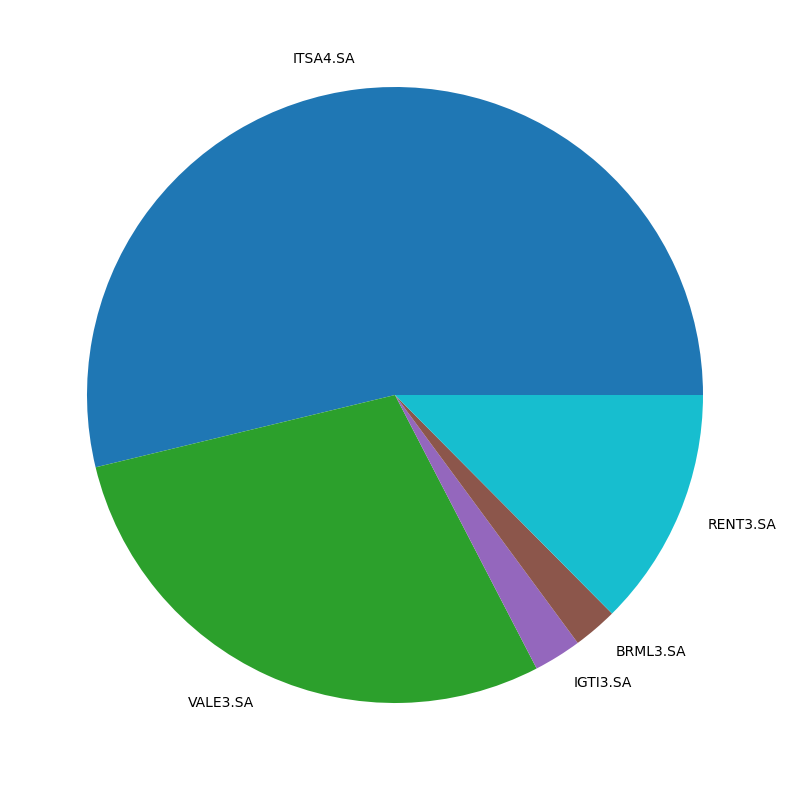

In [83]:
pd.Series(pesos_ativo).plot.pie(figsize=(10,10));

#### **14.6.5. Otimização Semivariância**

- Referência: Estrada, J (2007). Mean-Semivariance Optimization: A Heuristic Approach.

In [68]:
semicov = risk_models.semicovariance(carteira, benchmark=0)
semicov

,ABEV3.SA,BBAS3.SA,BBDC4.SA,BRML3.SA,IGTI3.SA,ITSA4.SA,LREN3.SA,PETR4.SA,RENT3.SA,VALE3.SA
ABEV3.SA,0.044149,0.038724,0.035853,0.037711,0.032821,0.030624,0.036629,0.041346,0.039185,0.026296
BBAS3.SA,0.038724,0.087160,0.064992,0.067870,0.046526,0.053865,0.059980,0.077169,0.064396,0.041121
BBDC4.SA,0.035853,0.064992,0.063410,0.057936,0.043148,0.048804,0.052227,0.061751,0.054792,0.035934
BRML3.SA,0.037711,0.067870,0.057936,0.087766,0.057496,0.046584,0.065055,0.065803,0.066718,0.037610
IGTI3.SA,0.032821,0.046526,0.043148,0.057496,0.130213,0.035375,0.052909,0.049252,0.056047,0.031744
ITSA4.SA,0.030624,0.053865,0.048804,0.046584,0.035375,0.047096,0.043169,0.050438,0.046936,0.030072
LREN3.SA,0.036629,0.059980,0.052227,0.065055,0.052909,0.043169,0.079863,0.058298,0.064111,0.035656
PETR4.SA,0.041346,0.077169,0.061751,0.065803,0.049252,0.050438,0.058298,0.121410,0.066166,0.054661
RENT3.SA,0.039185,0.064396,0.054792,0.066718,0.056047,0.046936,0.064111,0.066166,0.091781,0.042032
VALE3.SA,0.026296,0.041121,0.035934,0.037610,0.031744,0.030072,0.035656,0.054661,0.042032,0.077331


In [69]:
retornos_df = expected_returns.returns_from_prices(carteira)
retorno_df = retornos_df.dropna()

In [70]:
ef_semiv = EfficientSemivariance(capm_carteira, retornos_df)
ef_semiv.efficient_return(0.2)
ef_pesos = ef_semiv.clean_weights()
ef_pesos

OrderedDict([('ABEV3.SA', 0.10168),
             ('BBAS3.SA', 0.0644),
             ('BBDC4.SA', 0.16484),
             ('BRML3.SA', 0.0),
             ('IGTI3.SA', 0.0),
             ('ITSA4.SA', 0.20186),
             ('LREN3.SA', 0.08706),
             ('PETR4.SA', 0.05285),
             ('RENT3.SA', 0.07968),
             ('VALE3.SA', 0.24758)])

In [71]:
ef_semiv.portfolio_performance(verbose=True, risk_free_rate=selic_diaria)

Expected annual return: 20.0%
Annual semi-deviation: 20.1%
Sortino Ratio: 0.99


(0.20000005499024828, 0.20131536645653994, 0.9909262578430377)

### **14.7. Hierarchical Risk Parity**

- Marcos López de Prado: Building Diversified Portfolios that Outperform Out of Sample. The Journal of Portfolio Management, 42(4), 59–69.

In [85]:
hrp_portfolio = HRPOpt(retornos_df)

In [86]:
hrp_portfolio.optimize()

OrderedDict([('ABEV3.SA', 0.22937037001535981),
             ('BBAS3.SA', 0.06943223887721942),
             ('BBDC4.SA', 0.10458407540488127),
             ('BRML3.SA', 0.05394785341592874),
             ('IGTI3.SA', 0.031383980808807034),
             ('ITSA4.SA', 0.14662286437965685),
             ('LREN3.SA', 0.0576514652068956),
             ('PETR4.SA', 0.05421723299518197),
             ('RENT3.SA', 0.0776023834385099),
             ('VALE3.SA', 0.17518753545755944)])

In [87]:
hrp_portfolio.portfolio_performance(verbose=True, risk_free_rate=selic_diaria)

Expected annual return: 21.4%
Annual volatility: 27.5%
Sharpe Ratio: 0.78


(0.2143986864963599, 0.27497642439696973, 0.777838735463416)

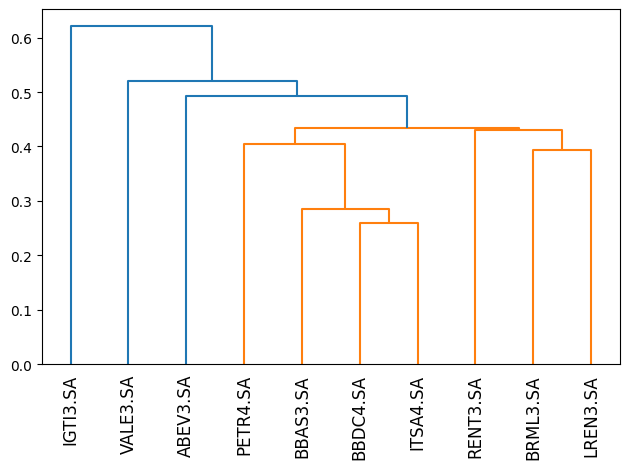

In [89]:
plotting.plot_dendrogram(hrp_portfolio);

## **15. Estratégias Quantitativas**

### **15.1. Cointegração e Pairs Trading**

#### **15.1.1. Processos Estocásticos e Séries Temporais**

##### **15.1.1.1. Processo Estocástico**

Sequência cronológica de observações de um evento que pode ser descrito através de uma distribuição de probabilidade.

Amostras de um processo estocástico tem um variável aleatória $X$ no momento $t$, sendo a amostra:
$$X_1, X_2, X_3...X_t$$
considerada uma série temporal.


Exemplos: número de casos de Covid, índice de assaltos na cidade de São Paulo, cotações da PETR4.

In [93]:
#Capturar os dados
petr4 = yf.download('PETR4.SA', start='2021-08-30', end='2022-08-30', auto_adjust=False, multi_level_index=False)

#Plotar
fig = go.Figure()
fig.add_trace(go.Scatter(name='PETR4', x=petr4.index, y=petr4['Adj Close']))
fig.update_layout(title_text='PETR4 Preços 1Y', template='simple_white', height=500, width=800)
fig.show()

[*********************100%***********************]  1 of 1 completed


##### **15.1.1.2. Estacionariedade e Não-Estacionariedade**

Consideramos um processo estacionário quando temos os parâmetros de **média** e **variância** constante.
Estacionariedade é uma premissa importante para modelarmos séries temporais, diversos modelos e testes estatísticos tem como premissa a estacionariedade da série temporal.

Preços de PETR4 são um exemplo de **série temporal não-estacionária**. Observe que a média **não serve** como parâmetro para tentar prever o comportamento futuro da série.

In [94]:
petr4['média'] = np.mean(petr4['Adj Close'])
fig = go.Figure()
fig.add_trace(go.Scatter(name='PETR4', x=petr4.index, y=petr4['Adj Close']))
fig.add_trace(go.Scatter(name='Média de PETR4', x=petr4.index, y=petr4['média']))
fig.update_layout(title_text='PETR4 Preços 1Y', template='simple_white', height=500, width=800)
fig.show()

Os **retornos** já possuem um comportamento um pouco mais parecido com uma série temporal estacionária, mas sem um teste estatístico não podemos afirmar com tanta certeza:

In [95]:
petr4['retornos'] = petr4['Adj Close'].pct_change()
petr4['media_retornos'] = np.mean(petr4.retornos)
fig = go.Figure()
fig.add_trace(go.Scatter(name='Retornos PETR4', x=petr4.index, y=petr4.retornos))
fig.add_trace(go.Scatter(name='Média dos Retornos', x=petr4.index, y=petr4.media_retornos))
fig.update_layout(title_text='Retornos PETR4 1Y', template='simple_white', height=500, width=800)
fig.show()

##### **15.1.1.3. Teste de Estacinariedade**

**Augumented Dick-Fuller Test**

É um teste de significância estatística para verificar se uma série é estacionária ou não.

- H0: tem raiz unitária (a série temporal não é estacionária)
- H1: não tem raiz unitária (série temporal é estacionária)

Estabelecendo um intervalo de confiança de 95% podemos testar a hipótese, analisar o p-valor e os valores críticos

In [96]:
# P-Valor para os preços

resultado = adfuller(petr4['Adj Close'])
resultado[1]

0.9962095471717515

In [97]:
# P-valor para os retornos

petr4.dropna(inplace=True)
resultado2 = adfuller(petr4['retornos'])
resultado2[1]

1.0957308448557177e-28

#### **15.1.2. Cointegração**

Cointegração é um método que analisa a estacionariedade entre o resíduo da regressão linear entre a diferenciação de dois ativos. A ideia é que duas séries temporais tem um equilibrio dinâmico no longo prazo e quando conseguimos identificar uma relação linear nesse equilíbrio podemos tradar o spread (diferença) entre essas duas séries.


Retomando o conceito de linearidade:

$$Y = b_1X_1 + b_2X_2...b_kX_k$$

Aqui temos algumas premissas:

- Beta é um vetor não-nulo
- Todos os elementos de $X_k$ são integrados de ordem (I) (primeira diferenciação)
- $Y$ estimado e $X_k$ são integrados de mesma ordem, seus resíduos são estacionários e há cointegração

##### **15.1.2.1. Capturar os Dados**

In [98]:
ativo1 = 'PETR4.SA'
ativo2 = 'PETR3.SA'

tickers = [ativo1, ativo2]

inicio ='2021-01-01'
fim='2022-08-30'

ativos = pd.DataFrame()

for i in tickers:

  df = yf.download(
      i, 
      start=inicio, 
      end=fim, 
      auto_adjust=False, 
      multi_level_index=False
      )['Adj Close']
  df.rename(i, inplace=True)
  ativos = pd.concat([ativos,df], axis=1)
  ativos.index.name='Date'

ativos

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,PETR4.SA,PETR3.SA
Date,,
2021-01-04 00:00:00,9.253229,9.660735
2021-01-05 00:00:00,9.614908,9.955473
2021-01-06 00:00:00,9.634113,10.070090
2021-01-07 00:00:00,9.922174,10.364823
2021-01-08 00:00:00,9.960584,10.345177
...,...,...
2022-08-23 00:00:00,19.715199,21.665632
2022-08-24 00:00:00,19.833111,21.811155
2022-08-25 00:00:00,19.620865,21.589960


In [99]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ativos.index, y=ativos[ativo1], name=ativo1))
fig.add_trace(go.Scatter(x=ativos.index, y=ativos[ativo2], name=ativo2))
fig.update_layout(title_text='Preços', template='simple_white')
fig.show()

In [100]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ativos[ativo1], y=ativos[ativo2], mode='markers'))
fig.update_layout(title_text='Preços', template='simple_white')
fig.show()

In [101]:
retornos = ativos.pct_change()

fig = go.Figure()
fig.add_trace(go.Scatter(x=retornos[ativo1], y=retornos[ativo2], mode='markers'))
fig.update_layout(title_text='Retornos', template='simple_white')
fig.show()

##### **15.1.2.2. Testando Cointegração**

In [102]:
ativos.dropna(inplace=True)

In [103]:
score, pvalue, _ = coint(ativos[ativo1], ativos[ativo2])
pvalue

0.0863939793540025

##### **15.1.2.3. Calcular o Spread**

In [104]:
X1 = ativos[ativo1]
X2 = ativos[ativo2]

In [105]:
X1 = sm.add_constant(X1)

resultado = sm.OLS(X2, X1).fit()

X1 = X1[ativo1]

beta = resultado.params[ativo1]

In [106]:
spread = X2 - beta * X1

In [107]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=spread.index, y=spread, name='Spread'))
fig.update_layout(title_text='Spread', template='simple_white')
fig.show()

In [108]:
teste = adfuller(spread)
teste[1]

0.022873920646145806

##### **15.1.2.4. Caclculando o Z-Score**

Métrica que nos diz quantos desvios o valor está distante em relação à média, facilitando a criação de um trigger para o trading de pares

$$Z = \frac{x - mu}{\sigma}$$

In [109]:
z_score = (spread- spread.mean())/np.std(spread)

In [110]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=z_score.index, y=z_score, name='Z_Score'))
fig.update_layout(title_text='Z_Score', template='simple_white')
fig.show()

In [112]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=ativos.index, y=ativos[ativo1], name=ativo1), row=1, col=1)
fig.add_trace(go.Scatter(x=ativos.index, y=ativos[ativo2], name=ativo2), row=1, col=1)
fig.add_trace(go.Scatter(x=z_score.index, y=z_score, name='Z_Score'), row=2, col=1)
fig.update_layout(title_text='Análise Z_Score', template='simple_white', height=600, width=900)
fig.show()

#### **15.1.3. Backtest**

- $Spread = X_2 - \beta{X_1}$

- Definir o threshold do $z_{}score$

- $z_{}score > threshold$ = vender ação X2 e comprar ação X1 (SHORT THE SPREAD)

- $z_{}score < threshold$ = comprar ação X2 e vender ação X1 (LONG THE SPREAD)

In [115]:
ativos_open = pd.DataFrame()

for i in tickers:

  df2 = yf.download(i, start=inicio, end=fim, auto_adjust=False, multi_level_index=False)['Open']
  df2.rename(i, inplace=True)
  ativos_open = pd.concat([ativos_open, df2], axis=1)
  ativos_open.index.name='Date'

ativos_open

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


,PETR4.SA,PETR3.SA
Date,,
2021-01-04 00:00:00,28.650000,29.139999
2021-01-05 00:00:00,28.900000,29.459999
2021-01-06 00:00:00,30.160000,30.500000
2021-01-07 00:00:00,30.340000,30.920000
2021-01-08 00:00:00,31.459999,31.879999
...,...,...
2022-08-23 00:00:00,32.630001,36.000000
2022-08-24 00:00:00,33.540001,37.419998
2022-08-25 00:00:00,34.099998,37.869999


In [116]:
# Parametros

CAIXA = 100000
TAXA = 0.00
PCT_ORDEM1 = 0.1
PCT_ORDEM2 = 0.1
BANDA_SUPERIOR = 1
BANDA_INFERIOR = -1

In [117]:
# Gerar os sinais de long and short

vbt_sinal_short = (z_score > BANDA_SUPERIOR).rename('sinal_short')
vbt_sinal_long = (z_score < BANDA_INFERIOR).rename('sinal_long')

In [118]:
# Garantir mesmo tamanho para os vetores de sinal

vbt_sinal_short, vbt_sinal_long = pd.Series.vbt.signals.clean(
    vbt_sinal_short, vbt_sinal_long, entry_first=False, broadcast_kwargs=dict(columns_from='keep')
)

In [119]:
tickers_coluna = pd.Index([ativo1, ativo2], name='tickers')
vbt_ordem = pd.DataFrame(index=ativos.index, columns=tickers_coluna)
vbt_ordem[ativo1] = np.nan
vbt_ordem[ativo2] = np.nan
vbt_ordem.loc[vbt_sinal_short, ativo1] = -PCT_ORDEM1
vbt_ordem.loc[vbt_sinal_long, ativo1] = PCT_ORDEM1
vbt_ordem.loc[vbt_sinal_short, ativo2] = PCT_ORDEM2
vbt_ordem.loc[vbt_sinal_long, ativo2] = -PCT_ORDEM2

vbt_ordem = vbt_ordem.vbt.fshift(1)

print(vbt_ordem[~vbt_ordem.isnull().any(axis=1)])

tickers              PETR4.SA  PETR3.SA
Date                                   
2021-02-18 00:00:00       0.1      -0.1
2021-12-21 00:00:00      -0.1       0.1
2022-05-16 00:00:00       0.1      -0.1
2022-05-18 00:00:00      -0.1       0.1
2022-07-29 00:00:00       0.1      -0.1


In [120]:
def portfolio_pairs_trading():

    return vbt.Portfolio.from_orders(
        ativos,
        size=vbt_ordem,
        price=ativos_open,
        size_type='targetpercent',
        val_price=ativos.vbt.fshift(1),
        init_cash=CAIXA,
        fees=TAXA,
        cash_sharing=True,
        group_by=True,
        call_seq='auto',
        freq='d'
    )

vbt_pf = portfolio_pairs_trading()

In [121]:
print(vbt_pf.orders.records_readable)

   Order Id                Column  Timestamp         Size      Price  Fees  \
0         0  (PETR3.SA, PETR3.SA) 2021-02-18  1028.840070  30.500000   0.0   
1         1  (PETR4.SA, PETR4.SA) 2021-02-18  1055.868567  30.379999   0.0   
2         2  (PETR4.SA, PETR4.SA) 2021-12-21  1944.522374  28.549999   0.0   
3         3  (PETR3.SA, PETR3.SA) 2021-12-21  1842.088096  30.510000   0.0   
4         4  (PETR3.SA, PETR3.SA) 2022-05-16  1430.261434  36.740002   0.0   
5         5  (PETR4.SA, PETR4.SA) 2022-05-16  1555.667820  34.250000   0.0   
6         6  (PETR4.SA, PETR4.SA) 2022-05-18  1329.991659  34.180000   0.0   
7         7  (PETR3.SA, PETR3.SA) 2022-05-18  1211.131783  37.509998   0.0   
8         8  (PETR3.SA, PETR3.SA) 2022-07-29  1177.567543  36.070000   0.0   
9         9  (PETR4.SA, PETR4.SA) 2022-07-29  1292.390173  33.599998   0.0   

   Side  
0  Sell  
1   Buy  
2  Sell  
3   Buy  
4  Sell  
5   Buy  
6  Sell  
7   Buy  
8  Sell  
9   Buy  


d:\current_projects\material_PMF_2.0\.venv\Lib\site-packages\vectorbt\records\base.py:624: FutureWarning:

Setting an Index with object dtype into a DataFrame will stop inferring another dtype in a future version. Cast the Index explicitly before setting it into the DataFrame.



In [122]:
print(vbt_pf.stats())

Start                         2021-01-04 00:00:00
End                           2022-08-29 00:00:00
Period                          413 days 00:00:00
Start Value                              100000.0
End Value                             96760.16064
Total Return [%]                        -3.239839
Benchmark Return [%]                   125.140369
Max Gross Exposure [%]                   0.900729
Total Fees Paid                               0.0
Max Drawdown [%]                         3.284384
Max Drawdown Duration           383 days 00:00:00
Total Trades                                   10
Total Closed Trades                             8
Total Open Trades                               2
Open Trade PnL                        -305.729909
Win Rate [%]                                 25.0
Best Trade [%]                          20.419539
Worst Trade [%]                        -19.964977
Avg Winning Trade [%]                   11.058222
Avg Losing Trade [%]                    -5.360102


In [ ]:
vbt_pf.plot().show()

d:\current_projects\material_PMF_2.0\.venv\Lib\site-packages\vectorbt\generic\plots_builder.py:339: UserWarning:

Subplot 'orders' does not support grouped data

d:\current_projects\material_PMF_2.0\.venv\Lib\site-packages\vectorbt\generic\plots_builder.py:339: UserWarning:

Subplot 'trade_pnl' does not support grouped data



### **15.2. Beta Hedging**

Como já vimos anteriormente, através da regressão linear com os retornos do mercado conseguimos estimar o beta de um ativo ou de uma carteira. O valor do beta nos mostra o que é o risco sistemático - aquele risco que não conseguimos diversificar, pois advém da volatilidade do mercado como um todo.

$$Y = \alpha + \beta$$

#### **15.2.1. Exemplo com um Ativo**

In [125]:
bvsp = yf.download(
    'BOVA11.SA', 
    start='2021-01-01', 
    end='2022-01-01',
    auto_adjust=False,
    multi_level_index=False
    )['Adj Close']
bbdc3 = yf.download(
    'BBDC3.SA', 
    start='2021-01-01', 
    end='2022-01-01',
    auto_adjust=False,
    multi_level_index=False
    )['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [126]:
bbdc3.head()

Date
2021-01-04    14.995792
2021-01-05    14.924094
2021-01-06    15.299257
2021-01-07    15.674436
2021-01-08    15.553610
Name: Adj Close, dtype: float64

In [127]:
# Calculando os retornos

retorno_bench = bvsp.pct_change()
retorno_bbdc3 = bbdc3.pct_change()

In [128]:
# Remover os NaNs

retorno_bench.dropna(inplace=True)
retorno_bbdc3.dropna(inplace=True)

In [129]:
# Representar graficamente

fig = go.Figure()
fig.add_trace(go.Scatter(name='BOVA11', x=retorno_bench.index, y=retorno_bench))
fig.add_trace(go.Scatter(name='BBDC3', x=retorno_bbdc3.index, y=retorno_bbdc3))
fig.update_layout(title_text='Retornos', template='simple_white')
fig.show()

In [130]:
# Modelo de regressão

X = retorno_bench.values
Y = retorno_bbdc3.values

In [134]:
X = sm.add_constant(X)

modelo = regression.linear_model.OLS(Y,X).fit()

alfa, beta = modelo.params[0], modelo.params[1]
print(alfa,beta)

-0.0003274163591692435 1.0740736330956886


#### **15.2.2. Carteira com Beta Hedging**

- $Y = \alpha + \beta + (-\beta)$
- $Y = -1{\times}{\beta}{\times}\text{retorno\_bench}+ \text{retorno\_ativo}$

In [135]:
carteira = pd.DataFrame()
carteira['carteira'] = -1 * beta * retorno_bench + retorno_bbdc3
carteira

,carteira
Date,
2021-01-05,-0.010430
2021-01-06,0.026449
2021-01-07,-0.011295
2021-01-08,-0.026128
2021-01-11,0.000753
...,...
2021-12-23,0.004913
2021-12-27,0.002473
2021-12-28,0.005100


In [137]:
# Regressão

X = retorno_bench.values
Z = carteira['carteira'].values

X = sm.add_constant(X)

modelo = regression.linear_model.OLS(Z,X).fit()
alfa, beta = modelo.params[0], modelo.params[1]
print(alfa,beta)

-0.00032741635916924347 -3.2807957739411364e-16


#### **15.2.3. Backtesting - Exemplo com uma Carteira Pesos $\frac{1}{n}$**

##### **15.2.3.1. Buscar Beta in Sample**

In [ ]:
# Parâmetros

# O ativo CIEL3 não existe mais na B3, assim substituímos por WEGE3
ativos = ['PETR4.SA', 'BBDC4.SA', 'ABEV3.SA', 'WEGE3.SA']
pesos = [0.25, 0.25, 0.25, 0.25]

portfolio =  yf.download(
    ativos, 
    start='2021-01-05', 
    end='2022-01-01',
    auto_adjust=False,
    multi_level_index=False
    )['Adj Close']

bvsp = yf.download(
    'BOVA11.SA', 
    start='2021-01-05', 
    end='2022-01-01',
    auto_adjust=False,
    multi_level_index=False
    )['Adj Close']

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  1 of 1 completed


In [168]:
# Dataprep

r_portfolio = portfolio.pct_change()
r_carteira = pd.DataFrame()
r_carteira['carteira'] = (r_portfolio * pesos).sum(axis=1)
r_carteira.dropna(inplace=True)

r_mercado = pd.DataFrame()
r_mercado['mercado'] = bvsp.pct_change()
r_mercado.dropna(inplace=True)

In [169]:
r_mercado.head()

,mercado
Date,
2021-01-06,-0.001221
2021-01-07,0.033348
2021-01-08,0.017150
2021-01-11,-0.014784
2021-01-12,0.006997


In [170]:
r_carteira.head()

,carteira
Date,
2021-01-05,0.000000
2021-01-06,0.020474
2021-01-07,0.023204
2021-01-08,0.021409
2021-01-11,-0.020688


In [171]:
regressao = pd.merge(r_mercado, r_carteira, how='inner', left_index=True, right_index=True)
regressao

,mercado,carteira
Date,,
2021-01-06,-0.001221,0.020474
2021-01-07,0.033348,0.023204
2021-01-08,0.017150,0.021409
2021-01-11,-0.014784,-0.020688
2021-01-12,0.006997,0.017554
...,...,...
2021-12-23,-0.005718,0.003405
2021-12-27,0.007437,0.004002
2021-12-28,-0.005315,0.000105


In [172]:
# Regressão linear

X = regressao['mercado'].values
Y = regressao['carteira'].values

X = sm.add_constant(X)

modelo = regression.linear_model.OLS(Y,X).fit()

alfa_in, beta_in = modelo.params[0], modelo.params[1]
print(alfa_in, beta_in)

0.0005025282004679763 0.993869679419421


##### **15.2.3.2. Out of Sample**

In [173]:
# Parâmetros out of sample - 6 meses para frente

portfolio_out =  yf.download(
    ativos, start='2022-01-01', 
    end='2022-06-30',
    auto_adjust=False,
    multi_level_index=False
    )['Adj Close']
bvsp_out = yf.download(
    'BOVA11.SA', 
    start='2022-01-01', 
    end='2022-06-30',
    auto_adjust=False,
    multi_level_index=False
    )['Adj Close']

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  1 of 1 completed


In [174]:
# Data prep out of sample

r_portfolio_out = portfolio_out.pct_change()
r_carteira_out = pd.DataFrame()
r_carteira_out['carteira'] = (r_portfolio_out * pesos).sum(axis=1)
r_carteira_out.dropna(inplace=True)


r_mercado_out = pd.DataFrame()
r_mercado_out['mercado'] = bvsp_out.pct_change()
r_mercado_out.dropna(inplace=True)

In [175]:
regressao_out = pd.merge(r_mercado_out, r_carteira_out, how='inner', left_index=True, right_index=True)
regressao_out

,mercado,carteira
Date,,
2022-01-04,-0.003603,0.001009
2022-01-05,-0.024807,-0.029524
2022-01-06,0.007724,-0.000698
2022-01-07,0.008687,-0.005565
2022-01-10,-0.002736,-0.005804
...,...,...
2022-06-23,-0.014266,-0.009504
2022-06-24,0.008557,0.007721
2022-06-27,0.019692,0.015867


In [176]:
#Regressão out of sample

X_out = regressao_out['mercado'].values
Y_out = regressao_out['carteira'].values

X_out = sm.add_constant(X_out)

modelo_out = regression.linear_model.OLS(Y_out, X_out).fit()

alfa_out, beta_out = modelo_out.params[0], modelo_out.params[1]
print(alfa_out, beta_out)

0.00010194501796250528 0.8256047800624199


##### **15.2.3.3. Criar a Carteira com o Hedge**

In [177]:
carteira_hedge = pd.DataFrame()
carteira_hedge['hedge'] = -1*beta_in * r_mercado_out['mercado'] + r_carteira_out['carteira']
carteira_hedge.dropna(inplace=True)
beta_out = pd.merge(carteira_hedge, r_mercado_out, how='inner', left_index=True, right_index=True)

In [178]:
# Regressão

F = beta_out['hedge'].values
G = beta_out['mercado'].values

G = sm.add_constant(G)

modelo = regression.linear_model.OLS(F,G).fit()

alfa_h, beta_h = modelo.params[0], modelo.params[1]
print(alfa_h, beta_h)

0.00010194501796250544 -0.16826489935700087
